In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import os
from datetime import datetime, timedelta
import shutil
import glob

In [175]:
plt.rcParams.update({'font.size': 11, 'axes.labelsize': 10, 'axes.titlesize': 16})
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
#plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'black'
#plt.rcParams['ytick.color'] = 'white'
plt.rcParams['figure.figsize'] = (22, 11)

# Grid with opacity and in background
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'lightgray'
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['axes.axisbelow'] = True

plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlecolor'] = 'black'
#plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'black'
# plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'gray'
plt.rcParams['text.color'] = 'black'
sns.set_palette("viridis")


In [176]:
# Set TODAY DATE
#today_date = pd.Timestamp.now(tz='UTC')
today_date = pd.Timestamp('2025-05-23', tz='UTC') # For testing purposes
today_iso = pd.to_datetime(today_date).isocalendar()


# Set REFUND PERDIOD DURATION
REFUND_PERIOD_DAYS = 14  # Duration of the refund period in days

# Set thresholds for cleaning
HIGH_VOLUME_THRESHOLD = 4
DUPLICATE_THRESHOLD_MINUTES = 15


# Set DIRECTORIES
data_dir = 'csv_go_here'
archive_csv_dir = 'archive/csv'
archive_png_dir = 'archive/analysis/png'
archive_pdf_dir = 'archive/analysis/pdf'
analysis_dir = 'analysis'

In [177]:
def get_file_creation_date(file_path):
    """
    Get the creation date of a file and return it as a formatted string
    Returns format: YYYY-MM-DD
    """
    try:
        # Get file creation time (or modification time if creation not available)
        if os.name == 'nt':  # Windows
            creation_time = os.path.getctime(file_path)
        else:  # Unix/Linux/Mac
            creation_time = os.path.getmtime(file_path)

        # Convert to datetime and format
        creation_date = datetime.fromtimestamp(creation_time)
        return creation_date.strftime('%Y-%m-%d')

    except Exception as e:
        print(f"❌ Error getting creation date for {file_path}: {e}")
        # Fallback to today's date
        return datetime.now().strftime('%Y-%m-%d')


def transfer_files_to_archive():
    """
    Enhanced version with date-based organization
    Transfer PNG files from analysis_dir to archive_png_dir/YYYY-MM-DD/
    Transfer PDF files from analysis_dir to archive_pdf_dir/YYYY-MM-DD/
    """
    timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    # === TRANSFER PNG FILES ===
    png_files = glob.glob(os.path.join(analysis_dir, "*.png"))
    png_transferred = 0

    for png_file in png_files:
        filename = os.path.basename(png_file)

        # Get creation date for organization
        creation_date = get_file_creation_date(png_file)

        # Create date-based directory in archive
        date_archive_dir = os.path.join(archive_png_dir, creation_date)
        os.makedirs(date_archive_dir, exist_ok=True)

        # Set destination with date organization
        destination = os.path.join(date_archive_dir, filename)

        try:
            # Copy file to archive (keep original in analysis_dir)
            shutil.copy2(png_file, destination)
            print(f"📊 PNG archived: {creation_date}/{filename}")
            png_transferred += 1
        except Exception as e:
            print(f"❌ Error archiving PNG {filename}: {e}")

    # === TRANSFER PDF FILES ===
    pdf_files = glob.glob(os.path.join(analysis_dir, "*.pdf"))
    pdf_transferred = 0

    for pdf_file in pdf_files:
        filename = os.path.basename(pdf_file)

        # Get creation date for organization
        creation_date = get_file_creation_date(pdf_file)

        # Create date-based directory in archive
        date_archive_dir = os.path.join(archive_pdf_dir, creation_date)
        os.makedirs(date_archive_dir, exist_ok=True)

        # Set destination with date organization
        destination = os.path.join(date_archive_dir, filename)

        try:
            # Copy file to archive (keep original in analysis_dir)
            shutil.copy2(pdf_file, destination)
            print(f"📄 PDF archived: {creation_date}/{filename}")
            pdf_transferred += 1
        except Exception as e:
            print(f"❌ Error archiving PDF {filename}: {e}")

    # === SUMMARY ===
    print(f"\n📦 ARCHIVING SUMMARY ({timestamp}):")
    print(f"   PNG files transferred: {png_transferred}")
    print(f"   PDF files transferred: {pdf_transferred}")
    print(f"   Total files archived: {png_transferred + pdf_transferred}")

    return png_transferred, pdf_transferred


def clean_analysis_dir_after_archive():
    """
    OPTIONAL: Remove files from analysis_dir after successful archiving
    USE WITH CAUTION - This will delete the original files!
    Enhanced with better logging and date information
    """
    # Get all PNG and PDF files in analysis_dir
    png_files = glob.glob(os.path.join(analysis_dir, "*.png"))
    pdf_files = glob.glob(os.path.join(analysis_dir, "*.pdf"))
    all_files = png_files + pdf_files

    if not all_files:
        print("🗑️  No files to clean in analysis directory")
        return 0

    print(f"🗑️  Cleaning {len(all_files)} files from {analysis_dir}...")

    cleaned_files = 0

    for file_path in all_files:
        try:
            filename = os.path.basename(file_path)
            creation_date = get_file_creation_date(file_path)

            os.remove(file_path)
            print(f"🗑️  Cleaned: {filename} (was from {creation_date})")
            cleaned_files += 1

        except Exception as e:
            print(f"❌ Error cleaning {file_path}: {e}")

    print(f"🧹 Cleanup complete: {cleaned_files} files removed from {analysis_dir}")
    return cleaned_files


transfer_files_to_archive()
clean_analysis_dir_after_archive()


📊 PNG archived: 2025-07-01/conversion_funnel_cohort_2025-W17_2025-05-23.png
📊 PNG archived: 2025-07-01/weekly_trials_8_weeks_2025-05-23.png
📊 PNG archived: 2025-07-01/weekly_flow_all_time_2025-05-23.png
📊 PNG archived: 2025-07-01/weekly_flow_8_weeks_2025-05-23.png
📊 PNG archived: 2025-07-01/conversion_funnel_comparison_2025-W17_2025-05-23.png
📊 PNG archived: 2025-07-01/weekly_renewal_flow_8_weeks_2025-05-23.png
📊 PNG archived: 2025-07-01/weekly_renewal_flow_all_time_2025-05-23.png
📊 PNG archived: 2025-07-01/weekly_trials_all_time_2025-05-23.png
📄 PDF archived: 2025-07-01/ANALYSIS_REPORT_2025-05-23.pdf

📦 ARCHIVING SUMMARY (2025-07-01 17:07:06):
   PNG files transferred: 8
   PDF files transferred: 1
   Total files archived: 9
🗑️  Cleaning 9 files from analysis...
🗑️  Cleaned: conversion_funnel_cohort_2025-W17_2025-05-23.png (was from 2025-07-01)
🗑️  Cleaned: weekly_trials_8_weeks_2025-05-23.png (was from 2025-07-01)
🗑️  Cleaned: weekly_flow_all_time_2025-05-23.png (was from 2025-07-01)

9

In [178]:
# LOADING CSV

# Toggle this flag to True in production
RENAME_FILES = False
MOVE_FILES = False

# Ensure archive directory exists
os.makedirs(archive_csv_dir, exist_ok=True)


# List and sort files by creation time
files = [
    os.path.join(data_dir, f)
    for f in os.listdir(data_dir)
    if os.path.isfile(os.path.join(data_dir, f)) and f.endswith('.csv')]
sorted_files = sorted(files, key=os.path.getctime, reverse=True)


for i, file_path in enumerate(sorted_files, 1):
    print(f"  File {i}:\n {os.path.basename(file_path)}")

# Loop over files
processed_files = []
for file_path in sorted_files:
    created_at = datetime.fromtimestamp(os.path.getctime(file_path))
    timestamp_str = created_at.strftime('%Y-%m-%d_%H-%M')
    original_name = os.path.basename(file_path)
    new_name = f"{timestamp_str}_{original_name}"

    if RENAME_FILES:
        if not original_name.startswith(timestamp_str):
            new_path = os.path.join(data_dir, new_name)
            os.rename(file_path, new_path)
            print(f"Renamed:\n {original_name} →\n {new_name}\n")
            processed_files.append(new_path)
        else:
            processed_files.append(file_path)
    else:
        processed_files.append(file_path)

# Load both CSV files into pandas DataFrames
file1_path = processed_files[0]
print(f"\nLoading CSV files:")
print(f"  File 1: {os.path.basename(file1_path)}")

#### Niklas Code ####

# Load both CSV files into pandas DataFrames
file1_path = processed_files[0]
print(f"\nLoading CSV files:")
print(f"  File 1: {os.path.basename(file1_path)}")



sub_raw = pd.read_csv(file1_path, low_memory=False)


print(f"\nSuccessfully loaded:")
print(f"  sub_raw: {sub_raw.shape[0]} rows, {sub_raw.shape[1]} columns")


# Move files to archive
if MOVE_FILES:
    for file_path in processed_files:
        file_name = os.path.basename(file_path)
        archive_path = os.path.join(archive_csv_dir, file_name)

        if not os.path.exists(archive_path):
            os.rename(file_path, archive_path)
            print(f"Moved: {file_name} to archive")
        else:
            print(f"Already archived: {file_name}")
else:
    for file_path in processed_files:
        file_name = os.path.basename(file_path)

print("\nDataFrames available as: sub_raw")
print("\nProcessing complete!")
print('***************************************************')


  File 1:
 DishpatchSubscriptionData_NIklas_Sanitised - subscriptions.csv
  File 2:
 DishpatchInvoiceData_NIklas_Sanitised - invoices.csv

Loading CSV files:
  File 1: DishpatchSubscriptionData_NIklas_Sanitised - subscriptions.csv

Loading CSV files:
  File 1: DishpatchSubscriptionData_NIklas_Sanitised - subscriptions.csv

Successfully loaded:
  sub_raw: 20443 rows, 34 columns

DataFrames available as: sub_raw

Processing complete!
***************************************************


In [179]:
# DATA PREPROCESSING (customer_df)
def preprocess_data(input_df):
    """Clean and preprocess the subscription data"""
    df = input_df.copy()

    # Date conversion
    date_cols = [col for col in df.columns if '(UTC)' in col]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce', utc=True)

    df = df.sort_values(by='Created (UTC)')

    # Column selection and renaming
    columns_to_keep = [
        'id', 'Customer Name', 'Customer ID', 'Status', 'Cancellation Reason',
        'Created (UTC)', 'Start (UTC)', 'Current Period Start (UTC)',
        'Current Period End (UTC)', 'Trial Start (UTC)', 'Trial End (UTC)',
        'Canceled At (UTC)', 'Ended At (UTC)', 'senderShopifyCustomerId (metadata)'
    ]

    df = df[columns_to_keep]

    df.rename(columns={
        'id': 'subscription_id',
        'Customer ID': 'customer_id',
        'Customer Name': 'customer_name',
        'Status': 'status',
        'Cancellation Reason': 'cancellation_reason',
        'Created (UTC)': 'created_utc',
        'Start (UTC)': 'start_utc',
        'Current Period Start (UTC)': 'current_period_start_utc',
        'Current Period End (UTC)': 'current_period_end_utc',
        'Trial Start (UTC)': 'trial_start_utc',
        'Trial End (UTC)': 'trial_end_utc',
        'Canceled At (UTC)': 'canceled_at_utc',
        'Ended At (UTC)': 'ended_at_utc',
        'senderShopifyCustomerId (metadata)': 'is_gifted_member'
    }, inplace=True)

    # Convert is_gifted_member to boolean
    df['is_gifted_member'] = df['is_gifted_member'].notna()
    df['was_gifted_member'] = False


    # Reference date for analysis
    print(f"📅 Reference date (TODAY) : {today_date.strftime('%d-%m-%Y')}")
    print(f"{len(df)} entries loaded from {file_path}")
    print('***************************************************')

    return df

sub_df = preprocess_data(sub_raw)

📅 Reference date (TODAY) : 23-05-2025
20443 entries loaded from csv_go_here/DishpatchInvoiceData_NIklas_Sanitised - invoices.csv
***************************************************


In [180]:
# REMOVE ALL MULTI-SUB customer_id from sub_df, put them im a new df multisub_df
def remove_multi_subscriptions(df):
    """Remove customers with multiple subscriptions and return a new DataFrame"""
    df = df.copy()

    # Count subscriptions per customer
    subscription_counts = df['customer_id'].value_counts()

    # Get customers with more than one subscription
    multi_sub_customers = subscription_counts[subscription_counts > 1].index.tolist()

    # Filter out these customers from the main DataFrame
    single_sub_df = df[~df['customer_id'].isin(multi_sub_customers)]

    # Create a new DataFrame for multi-subscription customers
    multi_sub_df = df[df['customer_id'].isin(multi_sub_customers)]

    print(f"Removed {len(multi_sub_customers)} customers with multiple subscriptions.")
    print(f"Total single_sub_df: {len(single_sub_df)}, with {len(single_sub_df['customer_id'].unique())} unique customers")
    print(f"Total multi_sub_df: {len(multi_sub_df)}, with {len(multi_sub_df['customer_id'].unique())} unique customers")


    return single_sub_df, multi_sub_df


sub_df, multisub_df = remove_multi_subscriptions(sub_df)

Removed 377 customers with multiple subscriptions.
Total single_sub_df: 19599, with 19599 unique customers
Total multi_sub_df: 844, with 377 unique customers


In [181]:
# # DATA PREPROCESSING (invoices df)
# def preprocess_data_invoice(input_df):
#     """Clean and preprocess the subscription data"""
#     df = input_df.copy()

#     # Date conversion
#     date_cols = [col for col in df.columns if '(UTC)' in col]
#     for col in date_cols:
#         df[col] = pd.to_datetime(df[col], errors='coerce', utc=True)


#     # Column selection and renaming
#     columns_to_keep = [
#         'id', 'Customer Name', 'Customer', 'Amount Due', 'Amount Paid', 'Paid', 'Billing', 'Charge', 'Closed',
#         'Date (UTC)', 'Description', 'Number', 'Finalized At (UTC)',
#         'Paid At (UTC)', 'Minimum Line Item Period Start (UTC)', 'Maximum Line Item Period End (UTC)',
#         'Period End (UTC)', 'Subscription', 'Total Discount Amount', 'Applied Coupons', 'Status'
#         ]

#     df = df[columns_to_keep]

#     df.rename(columns={
#         'id': 'invoice_id',
#         'Status': 'inv_status',
#         'Customer': 'customer_id',
#         'Customer Name': 'customer_name',
#         'Date (UTC)' : 'date_utc',
#         'Description': 'description',
#         'Paid At (UTC)': 'paid_at_utc',
#         'Amount Paid': 'amount_paid',
#         'Subscription': 'subscription_id',
#     }, inplace=True)

#     return df

# inv_df = preprocess_data_invoice(inv_raw)

In [182]:
# Removing customers with more than 4 subscriptions (Probably testing accounts)
def remove_high_volume_customers(df, threshold=HIGH_VOLUME_THRESHOLD):
    """Remove customers with more than a specified number of subscriptions"""
    df = df.copy()

    original_count = len(df)

    customer_counts = df['customer_id'].value_counts()
    high_volume_customers = customer_counts[customer_counts > threshold].index

    df = df[~df['customer_id'].isin(high_volume_customers)]

    print(f'{original_count - len(df)} subscriptions removed from \
{len(high_volume_customers)} customers with more than {threshold} subscriptions')
    print('***************************************************')

    return df


multisub_df = remove_high_volume_customers(multisub_df)

56 subscriptions removed from 6 customers with more than 4 subscriptions
***************************************************


In [183]:
def clean_inconsistent_statuses(df):
    """
    Fixes inconsistent statuses (active but canceled_at exists)
    """
    df = df.copy()

    # If canceled_at exists AND status='active' → force status='canceled'
    inconsistent_mask = (
        (df['canceled_at_utc'].notna()) &
        (df['status'] == 'active')
    )

    print(f"🔧 Fixing {inconsistent_mask.sum()} inconsistent subscriptions")
    df.loc[inconsistent_mask, 'status'] = 'canceled'

    return df


def custom_multisub_aggregation(df):
    """
    Robust version that handles NaT in date columns
    """

    def safe_get_first_trial_start(group):
        """If multiple trials exist, take the first one - handles NaT"""
        try:
            trial_starts = group['trial_start_utc'].dropna()
            if len(trial_starts) > 0:
                return trial_starts.iloc[0]
            else:
                return pd.NaT
        except (KeyError, IndexError, AttributeError):
            return pd.NaT

    def safe_get_first_trial_end(group):
        """If multiple trials exist, take the first one - handles NaT"""
        try:
            trial_ends = group['trial_end_utc'].dropna()
            if len(trial_ends) > 0:
                return trial_ends.iloc[0]
            else:
                return pd.NaT
        except (KeyError, IndexError, AttributeError):
            return pd.NaT

    def safe_get_smart_canceled_at(group):
        """Smart logic for canceled_at - handles NaT"""
        try:
            group_sorted = group.sort_values('created_utc')

            # If only one subscription
            if len(group_sorted) == 1:
                return group_sorted['canceled_at_utc'].iloc[0]

            # Check for overlaps
            for i in range(len(group_sorted) - 1):
                current_canceled = group_sorted.iloc[i]['canceled_at_utc']
                next_period_start = group_sorted.iloc[i + 1]['current_period_start_utc']

                if pd.notna(current_canceled) and pd.notna(next_period_start):
                    if current_canceled == next_period_start:
                        return group['canceled_at_utc'].max()

            # Check if canceled_at > current_period_start
            for _, row in group_sorted.iterrows():
                canceled_at = row['canceled_at_utc']
                period_start = row['current_period_start_utc']

                if pd.notna(canceled_at) and pd.notna(period_start):
                    if canceled_at > period_start:
                        return canceled_at

            # Otherwise first non-null
            canceled_dates = group['canceled_at_utc'].dropna()
            if len(canceled_dates) > 0:
                return canceled_dates.iloc[0]
            else:
                return pd.NaT

        except (KeyError, IndexError, AttributeError):
            return pd.NaT

    def safe_get_smart_ended_at(group):
        """Smart logic for ended_at - handles NaT"""
        try:
            group_sorted = group.sort_values('created_utc')

            # If only one subscription
            if len(group_sorted) == 1:
                return group_sorted['ended_at_utc'].iloc[0]

            # Check for overlaps
            for i in range(len(group_sorted) - 1):
                current_ended = group_sorted.iloc[i]['ended_at_utc']
                next_period_start = group_sorted.iloc[i + 1]['current_period_start_utc']

                if pd.notna(current_ended) and pd.notna(next_period_start):
                    if current_ended == next_period_start:
                        return group['ended_at_utc'].max()

            # Check if ended_at > current_period_start
            for _, row in group_sorted.iterrows():
                ended_at = row['ended_at_utc']
                period_start = row['current_period_start_utc']

                if pd.notna(ended_at) and pd.notna(period_start):
                    if ended_at > period_start:
                        return ended_at

            # Otherwise first non-null
            ended_dates = group['ended_at_utc'].dropna()
            if len(ended_dates) > 0:
                return ended_dates.iloc[0]
            else:
                return pd.NaT

        except (KeyError, IndexError, AttributeError):
            return pd.NaT

    def safe_was_ever_gifted(group):
        """Check if the customer was ever gifted - handles errors"""
        try:
            return group['is_gifted_member'].any()
        except (KeyError, AttributeError):
            return False

    # Clean inconsistent statuses
    df_clean = clean_inconsistent_statuses(df)

    print("🔄 Executing robust aggregation with NaT handling...")

    # Aggregation with lambda to avoid pandas errors
    result = df_clean.groupby('customer_id').agg({
        'subscription_id': 'last',
        'customer_name': 'last',
        'status': 'last',
        'cancellation_reason': 'last',
        'created_utc': 'first',
        'current_period_start_utc': 'last',
        'current_period_end_utc': 'last',
        'trial_start_utc': lambda x: safe_get_first_trial_start(x.to_frame().assign(**{col: df_clean.loc[x.index, col] for col in df_clean.columns})),
        'trial_end_utc': lambda x: safe_get_first_trial_end(x.to_frame().assign(**{col: df_clean.loc[x.index, col] for col in df_clean.columns})),
        'canceled_at_utc': lambda x: safe_get_smart_canceled_at(x.to_frame().assign(**{col: df_clean.loc[x.index, col] for col in df_clean.columns})),
        'ended_at_utc': lambda x: safe_get_smart_ended_at(x.to_frame().assign(**{col: df_clean.loc[x.index, col] for col in df_clean.columns})),
        'is_gifted_member': 'last'
    }).reset_index()

    # Add was_gifted_member separately
    try:
        result['was_gifted_member'] = df_clean.groupby('customer_id')['is_gifted_member'].apply(lambda x: x.any()).values
    except:
        result['was_gifted_member'] = False

    # Add start_utc and metadata
    result['start_utc'] = result['created_utc']
    subscription_counts = df_clean.groupby('customer_id').size()
    result['subscription_count'] = result['customer_id'].map(subscription_counts)
    result['is_multi_subscription'] = True

    print(f"✅ Robust aggregation completed: {len(result)} customers")

    return result

# === USAGE ===
print("🚀 Starting robust aggregation...")
multisub_df = custom_multisub_aggregation(multisub_df)

print(f"\n📊 RESULTS:")
print(f"   Shape: {multisub_df.shape}")
print(f"   Columns: {len(multisub_df.columns)}")

# Check for NaT
nat_counts = multisub_df.isna().sum()
print(f"\n🔍 NaT/NaN by column:")
for col, count in nat_counts.items():
    if count > 0:
        print(f"   {col}: {count}")

print(f"\n✅ Aggregation completed successfully!")

🚀 Starting robust aggregation...
🔧 Fixing 19 inconsistent subscriptions
🔄 Executing robust aggregation with NaT handling...
✅ Robust aggregation completed: 371 customers

📊 RESULTS:
   Shape: (371, 17)
   Columns: 17

🔍 NaT/NaN by column:
   trial_start_utc: 70
   trial_end_utc: 70

✅ Aggregation completed successfully!


In [184]:
def prepare_multisub_for_integration(multisub_df, sub_df):
    """
    Prepares multisub_df to have the same columns as sub_df
    """

    print("🔍 COLUMN COMPARISON:")
    print(f"   sub_df: {len(sub_df.columns)} columns")
    print(f"   multisub_df: {len(multisub_df.columns)} columns")

    # Columns in sub_df but not in multisub
    missing_in_multisub = set(sub_df.columns) - set(multisub_df.columns)

    # Columns in multisub but not in sub_df
    extra_in_multisub = set(multisub_df.columns) - set(sub_df.columns)

    print(f"\n📋 MISSING COLUMNS in multisub_df: {len(missing_in_multisub)}")
    for col in sorted(missing_in_multisub):
        print(f"   - {col}")

    print(f"\n📋 EXTRA COLUMNS in multisub_df: {len(extra_in_multisub)}")
    for col in sorted(extra_in_multisub):
        print(f"   - {col}")

    # Create a copy for modification
    multisub_prepared = multisub_df.copy()

    # === ADD MISSING COLUMNS ===
    print(f"\n🔧 ADDING MISSING COLUMNS...")

    for col in missing_in_multisub:
        if 'duration' in col.lower():
            # Duration columns: default to 0
            multisub_prepared[col] = 0
            print(f"   ✅ {col} = 0 (duration)")

        elif col.startswith('canceled_during') or col.startswith('is_') or col.startswith('trial_only'):
            # Boolean columns: default to False
            multisub_prepared[col] = False
            print(f"   ✅ {col} = False (boolean)")

        elif 'refund_period' in col:
            # Refund period columns: calculate or NaT
            multisub_prepared[col] = pd.NaT
            print(f"   ✅ {col} = NaT (date)")

        elif col in ['end_in', 'paid_duration', 'gift_duration']:
            # Specific columns
            multisub_prepared[col] = 0
            print(f"   ✅ {col} = 0 (numeric)")

        else:
            # Other columns: NaN/NaT depending on type
            sample_type = sub_df[col].dtype
            if 'datetime' in str(sample_type):
                multisub_prepared[col] = pd.NaT
                print(f"   ✅ {col} = NaT (datetime)")
            elif 'bool' in str(sample_type):
                multisub_prepared[col] = False
                print(f"   ✅ {col} = False (bool)")
            elif 'int' in str(sample_type) or 'float' in str(sample_type):
                multisub_prepared[col] = 0
                print(f"   ✅ {col} = 0 (numeric)")
            else:
                multisub_prepared[col] = None
                print(f"   ✅ {col} = None (other)")

    # === REORGANIZE COLUMNS IN THE SAME ORDER AS SUB_DF ===
    print(f"\n🔄 REORGANIZING COLUMNS...")

    # Take all columns from sub_df + extra columns from multisub
    target_columns = list(sub_df.columns) + [col for col in extra_in_multisub]

    # Keep only columns that exist now
    available_columns = [col for col in target_columns if col in multisub_prepared.columns]

    multisub_prepared = multisub_prepared[available_columns]

    print(f"   ✅ Columns reorganized: {len(multisub_prepared.columns)}")

    return multisub_prepared

def integrate_with_subdf(sub_df, multisub_df):
    """
    Intelligently integrates multisub_df with sub_df
    """

    print("🔄 PREPARING INTEGRATION...")

    # Prepare multisub for integration
    multisub_prepared = prepare_multisub_for_integration(multisub_df, sub_df)

    # Add differentiation columns
    sub_df_prepared = sub_df.copy()
    sub_df_prepared['is_multi_subscription'] = False
    sub_df_prepared['subscription_count'] = 1

    # Add was_gifted_member if missing in sub_df
    if 'was_gifted_member' not in sub_df_prepared.columns:
        sub_df_prepared['was_gifted_member'] = sub_df_prepared['is_gifted_member']

    print(f"\n📊 BEFORE INTEGRATION:")
    print(f"   sub_df_prepared: {sub_df_prepared.shape}")
    print(f"   multisub_prepared: {multisub_prepared.shape}")

    # Check that columns match now
    common_columns = set(sub_df_prepared.columns) & set(multisub_prepared.columns)
    print(f"   Common columns: {len(common_columns)}")

    # Take only common columns for integration
    common_columns_list = sorted(list(common_columns))

    sub_df_final = sub_df_prepared[common_columns_list]
    multisub_final = multisub_prepared[common_columns_list]

    # Concatenate
    combined_df = pd.concat([sub_df_final, multisub_final], ignore_index=True)

    print(f"\n✅ INTEGRATION COMPLETED:")
    print(f"   Combined DataFrame: {combined_df.shape}")
    print(f"   Single-sub customers: {len(sub_df_final)}")
    print(f"   Multi-sub customers: {len(multisub_final)}")
    print(f"   Total customers: {len(combined_df)}")
    print(f"   Total unique customer_ids: {combined_df['customer_id'].nunique()}")

    # Check for duplicates
    duplicated_customers = combined_df['customer_id'].duplicated().sum()
    if duplicated_customers > 0:
        print(f"   ⚠️  {duplicated_customers} duplicated customer_ids detected!")
    else:
        print(f"   ✅ No customer_id duplicates")

    return combined_df


combined_df = integrate_with_subdf(multisub_df, sub_df)
sub_df = combined_df.copy()

🔄 PREPARING INTEGRATION...
🔍 COLUMN COMPARISON:
   sub_df: 17 columns
   multisub_df: 15 columns

📋 MISSING COLUMNS in multisub_df: 2
   - is_multi_subscription
   - subscription_count

📋 EXTRA COLUMNS in multisub_df: 0

🔧 ADDING MISSING COLUMNS...
   ✅ is_multi_subscription = False (boolean)
   ✅ subscription_count = 0 (numeric)

🔄 REORGANIZING COLUMNS...
   ✅ Columns reorganized: 17

📊 BEFORE INTEGRATION:
   sub_df_prepared: (371, 17)
   multisub_prepared: (19599, 17)
   Common columns: 17

✅ INTEGRATION COMPLETED:
   Combined DataFrame: (19970, 17)
   Single-sub customers: 371
   Multi-sub customers: 19599
   Total customers: 19970
   Total unique customer_ids: 19970
   ✅ No customer_id duplicates


In [185]:
# CANCEL DURING TRIAL PERIOD
def cancel_during_trial(df):
    """Check if a member canceled during their trial period"""
    df =df.copy()

    df['canceled_during_trial'] = (
        (df['canceled_at_utc'].notna()) &
        (df['trial_end_utc'] > df['canceled_at_utc'])
    )
    return df

sub_df = cancel_during_trial(sub_df)

In [186]:
# REFUND PERIOD END TIME
# This function sets the 'refund_period_end_utc' column for each subscription.
# The refund period end date is calculated differently depending on whether the subscription started with a trial:
# - If 'trial_start_utc' is not null (i.e., the subscription had a trial), the refund period ends REFUND_PERIOD_DAYS after the trial ends ('trial_end_utc').
# - If there was no trial ('trial_start_utc' is null), the refund period ends REFUND_PERIOD_DAYS after the current paid period starts ('current_period_start_utc').
def refund_period_end_utc(df, REFUND_PERIOD_DAYS):
    df = df.copy()
    df['refund_period_end_utc'] = np.where(
        df['trial_start_utc'].notna() &
        (df['trial_end_utc'] > df['current_period_start_utc']),
        df['trial_end_utc'] + pd.Timedelta(days=REFUND_PERIOD_DAYS),
        df['current_period_start_utc'] + pd.Timedelta(days=REFUND_PERIOD_DAYS)
    )
    return df

# Apply the function to the subscriptions DataFrame
sub_df = refund_period_end_utc(sub_df, REFUND_PERIOD_DAYS)

In [187]:
# CANCEL DURRING REFUND PERIOD
def canceled_during_refund_period(df):
    """Check if a member canceled during their refund period"""
    df = df.copy()

    df['canceled_during_refund_period'] = (
        (df['canceled_at_utc'].notna()) &
        (df['canceled_during_trial'] == False) &
        (df['refund_period_end_utc'] > df['canceled_at_utc'])
    )
    return df

sub_df = canceled_during_refund_period(sub_df)


In [188]:
# FULL MEMBER STATUS
def full_member_status(df):
    """Determine if a customer is a full member based on business logic"""
    df = df.copy()

    # Full member if:
    # 1. Not canceled during trial
    # 2. Not canceled during refund period
    # 3. Not gifted
    # 4. Trial ended more than 14 days ago (if no trial, current_period_start_utc > 14 days ago)

    no_early_cancellation = (
        (~df['canceled_during_trial']) &
        (~df['canceled_during_refund_period'])
    )

    not_gifted = (~df['is_gifted_member'])

    refund_period_passed = (
            (today_date > df['refund_period_end_utc'])
            )

    df['is_full_member'] = (
        no_early_cancellation &
        not_gifted &
        refund_period_passed
    )

    return df

sub_df = full_member_status(sub_df)


In [189]:
# PAYING MEMBERS
def paying_members(df):
    """Determine if a customer is a paying member"""
    df = df.copy()

    # Paying member if:
    # 1. Not canceled
    # 2. Not gifted

    no_early_cancellation = ~df['canceled_during_trial']

    not_gifted = (~df['is_gifted_member'])


    df['is_paying_member'] = (
        no_early_cancellation &
        not_gifted
    )

    return df

sub_df = paying_members(sub_df)

In [190]:
# add ended_at_utc when needed
def add_ended_at_utc(df, today_date):
    """add ended_at_utc when needed"""
    df = df.copy()

    # if canceled during trial, set ended_at_utc to trial_end_utc
    df['ended_at_utc'] = np.where(
        (df['ended_at_utc'].isna()) & (df['canceled_during_trial']),
        df['trial_end_utc'],
        df['ended_at_utc']
    )

    # if canceled during refund period, set ended_at_utc to canceled_at_utc
    df['ended_at_utc'] = np.where(
        (df['ended_at_utc'].isna()) &
        (df['canceled_during_refund_period']) &
        (~df['canceled_during_trial']),
        df['canceled_at_utc'],
        df['ended_at_utc']
    )

    # if canceled after refund period, set ended_at_utc to current_period_end_utc
    df['ended_at_utc'] = np.where(
        (df['ended_at_utc'].isna()) &
        (df['canceled_at_utc'].notna()) &
        (~df['canceled_during_refund_period']) &
        (~df['canceled_during_trial']),
        np.minimum(df['current_period_end_utc'], today_date),
        df['ended_at_utc']
    )

    # if cancel_at_utc == current_period_start_utc, ended_at_utc = cancel_at_utc
    df['ended_at_utc'] = np.where(
        (df['ended_at_utc'].isna()) &
        (df['canceled_at_utc'].notna()) &
        (df['current_period_start_utc'] == df['canceled_at_utc']),
        df['canceled_at_utc'],
        df['canceled_at_utc']
    )

    return df


sub_df = add_ended_at_utc(sub_df, today_date)


In [191]:
# CALCULATING DURATIONS
def calculate_duration(df, today_date):  # ← ADD today_date as parameter
    """Calculate various durations in days with proper business logic"""

    # Trial duration (if trial exists)
    df['trial_duration'] = (df['trial_end_utc'] - df['trial_start_utc']).dt.days.fillna(0)
    # df['trial_duration_planned'] = (df['trial_end_utc'] - df['trial_start_utc']).dt.days.fillna(0)

    # # For cancellations during trial, limit trial_duration to actual usage
    # df['trial_duration'] = np.where(
    #     df['ended_at_utc'] < df['trial_end_utc'],  # Canceled during trial
    #     np.maximum(0, (df['ended_at_utc'] - df['trial_start_utc']).dt.days),  # Actual duration
    #     df['trial_duration_planned']  # Otherwise planned duration
    # )

    # Current period duration
    df['current_period_duration'] = (df['current_period_end_utc'] - df['current_period_start_utc']).dt.days

    # Trial-only subscription
    df['trial_only_subscription'] = (
        df['trial_start_utc'].notna() &
        df['trial_end_utc'].notna() &
        (df['trial_duration'] == df['current_period_duration'])
    )

    # Gift duration (only for gifted members)
    df['gift_duration'] = df['current_period_duration'].where(df['is_gifted_member'], 0)

    # Days until end for active subscriptions
    df['end_in'] = ((df['current_period_end_utc'] - today_date).dt.days).where(df['status'] == 'active', np.nan)


    df['real_duration'] = np.where(
        df['ended_at_utc'].notna(),
        #df['ended_at_utc'].notna() & (df['status'] != 'trialing'),
        (df['ended_at_utc'] - df['created_utc']).dt.days,
        (today_date - df['created_utc']).dt.days
    )


    max_possible = (today_date - df['created_utc'].min()).days
    df['real_duration'] = np.minimum(df['real_duration'], max_possible)

    df['paid_duration'] = df['real_duration'] - df['trial_duration']

    return df


sub_df = calculate_duration(sub_df, today_date)

In [192]:
def get_full_members_count(df):
    """Count the number of full members"""
    df = df.copy()

    df = df[df['is_full_member'] == True]
    df_active = df[df['status'] == 'active']
    df_not_active = df[df['status'] != 'active']


    dict_full_members = {'active': len(df_active),
                         'not_active': len(df_not_active),
                         'total': len(df)
                         }

    print(f"Total Active full member: {dict_full_members['active']}")
    print(f"Total not active full member: {dict_full_members['not_active']}")
    print(f"Total full member: {dict_full_members['total']}")


    return dict_full_members


dict_full_member = get_full_members_count(sub_df)


Total Active full member: 5334
Total not active full member: 1624
Total full member: 6958


In [193]:
def get_iso_week_bounds(year, week):
    jan_4 = datetime(year, 1, 4)
    week_1_monday = jan_4 - timedelta(days=jan_4.weekday())
    target_monday = week_1_monday + timedelta(weeks=week-1)
    target_sunday = target_monday + timedelta(days=6)

    return target_monday, target_sunday


def get_weeks_in_iso_year(year):
    dec_28 = datetime(year, 12, 28)

    return dec_28.isocalendar().week


def calculate_target_iso_week(today_iso, weeks_back):

    target_year, target_week = today_iso.year, today_iso.week

    # Recalculate X weeks
    for _ in range(weeks_back):
        target_week -= 1
        if target_week <= 0:
            target_year -= 1
            weeks_in_prev_year = get_weeks_in_iso_year(target_year)
            target_week = weeks_in_prev_year

    iso_week_key = f"{target_year}-W{target_week:02d}"

    return target_year, target_week, iso_week_key

In [194]:
def get_new_trial_last_week(df, today_iso, weeks_back=None):
    results = {}
    df = df[~df['is_gifted_member']].copy()

    df['iso_year'] = df['trial_start_utc'].dt.isocalendar().year
    df['iso_week'] = df['trial_start_utc'].dt.isocalendar().week
    df['iso_week_key'] = df['iso_year'].astype(str) + '-W' + df['iso_week'].astype(str).str.zfill(2)

    target_year, target_week, target_week_key = calculate_target_iso_week(today_iso, weeks_back)
    monday, sunday = get_iso_week_bounds(target_year, target_week)

    target_trials = df[df['iso_week_key'] == target_week_key]
    trials_count = len(target_trials)

    results = {
        'trials_count': trials_count,
        'iso_week_key': target_week_key,
        'monday': monday,
        'sunday': sunday,
        'period_label': f"{monday.strftime('%d-%m-%Y')} > {sunday.strftime('%d-%m-%Y')}"
    }


    return results

new_trial_last_week = get_new_trial_last_week(sub_df, today_iso, weeks_back=1)
new_trial_prev_week = get_new_trial_last_week(sub_df, today_iso, weeks_back=2)

new_trial_last_week, new_trial_prev_week

({'trials_count': 110,
  'iso_week_key': '2025-W20',
  'monday': datetime.datetime(2025, 5, 12, 0, 0),
  'sunday': datetime.datetime(2025, 5, 18, 0, 0),
  'period_label': '12-05-2025 > 18-05-2025'},
 {'trials_count': 100,
  'iso_week_key': '2025-W19',
  'monday': datetime.datetime(2025, 5, 5, 0, 0),
  'sunday': datetime.datetime(2025, 5, 11, 0, 0),
  'period_label': '05-05-2025 > 11-05-2025'})

In [195]:
# Count trials that converted to full members
def get_conversion_rate_last_weeks(df, today_iso, weeks_back):
    results = {}
    df = df[~df['is_gifted_member']].copy()

    target_year, target_week, target_week_key = calculate_target_iso_week(today_iso, weeks_back)
    monday, sunday = get_iso_week_bounds(target_year, target_week)

    new_trials_only = df[df['trial_start_utc'].notna()].copy()

    new_trials_only['expected_maturity_date'] = (new_trials_only['trial_end_utc'] + pd.Timedelta(days=REFUND_PERIOD_DAYS)).copy()

    week_end = sunday + timedelta(days=1)
    week_start_utc = pd.Timestamp(monday).tz_localize('UTC')
    week_end_utc = pd.Timestamp(week_end).tz_localize('UTC')

    mature_trials_this_week = new_trials_only[
        (new_trials_only['expected_maturity_date'] >= week_start_utc) &
        (new_trials_only['expected_maturity_date'] < week_end_utc)
    ].copy()

    total_trials = len(mature_trials_this_week)
    conversions = len(mature_trials_this_week[mature_trials_this_week['is_full_member'] == True]) if total_trials > 0 else 0
    conversion_rate = (conversions / total_trials * 100) if total_trials > 0 else 0.0

    results = {
        'conversion_rate': round(conversion_rate, 2),
        'total_trials': total_trials,
        'conversions': conversions,
        'iso_week_key': target_week_key,
        'week_start': monday,
        'week_end': sunday,
        'monday': monday,
        'sunday': sunday,
        'period': f"{monday.strftime('%d-%m-%Y')} > {sunday.strftime('%d-%m-%Y')}"}

    return results


last_week_conversion_rate = get_conversion_rate_last_weeks(sub_df, today_iso, weeks_back=1)
prev_week_conversion_rate = get_conversion_rate_last_weeks(sub_df, today_iso, weeks_back=2)

In [196]:
def get_churn_members_last_week(df, today_iso, weeks_back=1):
    df = df[~df['is_gifted_member']].copy()

    target_year, target_week, target_week_key = calculate_target_iso_week(today_iso, weeks_back)
    week_start, week_end = get_iso_week_bounds(target_year, target_week)

    week_start_utc = pd.Timestamp(week_start).tz_localize('UTC')
    week_end_utc = pd.Timestamp(week_end + timedelta(days=1)).tz_localize('UTC')

    churned_members_mask = (
        (df['canceled_at_utc'] >= week_start_utc) &
        (df['canceled_at_utc'] < week_end_utc) &
        (df['is_full_member'] == True)
    )

    churned_members = df[churned_members_mask].copy()
    count = len(churned_members)

    results = {
        'count': count,
        'iso_week_key': target_week_key,
        'week_start': week_start,
        'week_end': week_end,
        'monday': week_start,
        'sunday': week_end,
        'period': f"{week_start.strftime('%d-%m-%Y')} > {week_end.strftime('%d-%m-%Y')}"
    }

    return results


last_week_churned_members = get_churn_members_last_week(sub_df, today_iso, weeks_back=1)
prev_week_churned_members = get_churn_members_last_week(sub_df, today_iso, weeks_back=2)
prev_week_churned_members

{'count': 26,
 'iso_week_key': '2025-W19',
 'week_start': datetime.datetime(2025, 5, 5, 0, 0),
 'week_end': datetime.datetime(2025, 5, 11, 0, 0),
 'monday': datetime.datetime(2025, 5, 5, 0, 0),
 'sunday': datetime.datetime(2025, 5, 11, 0, 0),
 'period': '05-05-2025 > 11-05-2025'}

In [197]:
def cus_renewal(df):
    df = df[~df['is_gifted_member']].copy()

    # number of customers who had trial
    all_customers = df

    all_active_full_member = all_customers[(all_customers['is_full_member']) & (all_customers['status'] == 'active')]

    # number of customers who became full members (from trial)
    trial_to_full_member = all_customers[
        (~all_customers['canceled_during_trial']) &
        (all_customers['paid_duration'] > REFUND_PERIOD_DAYS) &
        (all_customers['refund_period_end_utc'] < today_date)]


    # trial > full member conversion rate
    conversion_rate = (len(trial_to_full_member) / len(all_customers) * 100)


    # 1st year customers
    customers_in_y1 = trial_to_full_member[trial_to_full_member['paid_duration'] < 365]

    # active in 1st year
    active_in_y1 = customers_in_y1[customers_in_y1['status'] == 'active']

    # chrun during 1st year
    canceled_during_y1 = customers_in_y1[customers_in_y1['canceled_at_utc'].notna()]

    # cancelation rate during y1
    y1_cancelation_rate = (len(canceled_during_y1) / len(customers_in_y1) * 100)





    # customers eligible to year 2
    eligible_for_y2 = trial_to_full_member[trial_to_full_member['paid_duration'] >= 365]

    # customer currently in year 2
    customers_in_y2 = trial_to_full_member[
        (trial_to_full_member['paid_duration'] >= 365) &
        (trial_to_full_member['paid_duration'] <= 730)
    ]

    # Cancel during refund period y2
    refund_during_y2 = customers_in_y2[(customers_in_y2['canceled_at_utc'].notna()) & (customers_in_y2['paid_duration'] <= (365 + REFUND_PERIOD_DAYS))]

    y2_refund_rate = (len(refund_during_y2) / len(customers_in_y2) * 100) if len(customers_in_y2) > 0 else 0

    # currently active in y2
    active_in_y2 = customers_in_y2[customers_in_y2['status'] == 'active']

    # customer who renewed for a second year
    renewed_to_y2 = eligible_for_y2[eligible_for_y2['paid_duration'] >= (365 + REFUND_PERIOD_DAYS)]

    # customer who canceled in year 2
    canceled_during_y2 = renewed_to_y2[renewed_to_y2['canceled_at_utc'].notna()]

    # renewal rate from y1 to y2
    renewal_rate_y1_to_y2 = (len(renewed_to_y2) / len(eligible_for_y2) * 100)

    # cancelation rate during y2
    y2_cancelation_rate = (len(canceled_during_y2) / len(renewed_to_y2) * 100)





    # customers eligible to year 3
    eligible_for_y3 = trial_to_full_member[trial_to_full_member['paid_duration'] > 730]

    # customer currently in year 3
    customers_in_y3 = eligible_for_y3[eligible_for_y3['paid_duration'] <= 1095]

    # currently active in y3
    active_in_y3 = customers_in_y3[customers_in_y3['status'] == 'active']

    # Cancel during refund period y2
    refund_during_y3 = customers_in_y3[(customers_in_y3['canceled_at_utc'].notna()) & (customers_in_y3['paid_duration'] <= (730 + REFUND_PERIOD_DAYS))]
    y3_refund_rate = (len(refund_during_y3) / len(customers_in_y3) * 100) if len(customers_in_y3) > 0 else 0

    # customer who renewed for a second year
    renewed_to_y3 = eligible_for_y3[eligible_for_y3['paid_duration'] >= (730 + REFUND_PERIOD_DAYS)]

    # customer who canceled in year 3
    canceled_during_y3 = renewed_to_y3[renewed_to_y3['canceled_at_utc'].notna()]

    # renewal rate from y2 to y3
    renewal_rate_y2_to_y3 = (len(renewed_to_y3) / len(eligible_for_y3) * 100) if len(eligible_for_y3) > 0 else 0


    # cancelation rate during y3
    y3_cancelation_rate = (len(canceled_during_y3) / len(eligible_for_y3) * 100) if len(eligible_for_y3) > 0 else 0



    renewal_dict = {
        'all_customers_df' : all_customers,
        'all_customer' : len(all_customers),

        'trial_to_full_member_df' : trial_to_full_member,
        'trial_to_full_member' : len(trial_to_full_member),

        'conversion_rate' : round(conversion_rate, 2),

        'all_active_full_member_df' : all_active_full_member,
        'all_active_full_member' : len(all_active_full_member),

        'customers_in_y1_df' : customers_in_y1,
        'customers_in_y1' : len(customers_in_y1),

        'active_in_y1_df' : active_in_y1,
        'active_in_y1' : len(active_in_y1),

        'canceled_during_y1_df' : canceled_during_y1,
        'canceled_during_y1' : len(canceled_during_y1),

        'y1_cancelation_rate' : round(y1_cancelation_rate, 2),

        'eligible_for_y2_df' : eligible_for_y2,
        'eligible_for_y2' : len(eligible_for_y2),

        'customer_in_y2_df' : customers_in_y2,
        'customer_in_y2' : len(customers_in_y2),

        'active_in_y2_df' : active_in_y2,
        'active_in_y2' : len(active_in_y2),

        'renewed_to_y2_df' : renewed_to_y2,
        'renewed_to_y2' : len(renewed_to_y2),

        'canceled_during_y2_df' : canceled_during_y2,
        'canceled_during_y2' : len(canceled_during_y2),

        'refund_during_y2_df' : refund_during_y2,
        'refund_during_y2' : len(refund_during_y2),

        'refund_rate_y2': round(y2_refund_rate, 2),

        'y2_cancelation_rate' : y2_cancelation_rate,
        'renewal_rate_y1_to_y2' : round(renewal_rate_y1_to_y2, 2),

        'eligible_for_y3_df' : eligible_for_y3,
        'eligible_for_y3' : len(eligible_for_y3),

        'customer_in_y3_df' : customers_in_y3,
        'customer_in_y3' : len(customers_in_y3),

        'active_in_y3_df' : active_in_y3,
        'active_in_y3' : len(active_in_y3),

        'refund_during_y3_df': refund_during_y3,
        'refund_during_y3': len(refund_during_y3),

        'refund_rate_y3': round(y3_refund_rate, 2),

        'renewed_to_y3_df' : renewed_to_y3,
        'renewed_to_y3' : len(renewed_to_y3),

        'canceled_during_y3_df' : canceled_during_y3,
        'canceled_during_y3' : len(canceled_during_y3),

        'y3_cancelation_rate' : y3_cancelation_rate,
        'renewal_rate_y2_to_y3' : round(renewal_rate_y2_to_y3, 2)
        }

    return renewal_dict


renewal_dict = cus_renewal(sub_df)

In [198]:
print("Key, Value\n")
for key, value in renewal_dict.items():
    if not key.endswith('_df'):
        print(f"{key}: {value}")

Key, Value

all_customer: 18732
trial_to_full_member: 7459
conversion_rate: 39.82
all_active_full_member: 5334
customers_in_y1: 5225
active_in_y1: 3886
canceled_during_y1: 1612
y1_cancelation_rate: 30.85
eligible_for_y2: 2234
customer_in_y2: 2234
active_in_y2: 1726
renewed_to_y2: 1934
canceled_during_y2: 246
refund_during_y2: 300
refund_rate_y2: 13.43
y2_cancelation_rate: 12.719751809720787
renewal_rate_y1_to_y2: 86.57
eligible_for_y3: 0
customer_in_y3: 0
active_in_y3: 0
refund_during_y3: 0
refund_rate_y3: 0
renewed_to_y3: 0
canceled_during_y3: 0
y3_cancelation_rate: 0
renewal_rate_y2_to_y3: 0


In [199]:
def get_new_full_members_last_week(df, today_iso, weeks_back, REFUND_PERIOD_DAYS):
    renewal_dict = cus_renewal(sub_df)
    trial_to_full_member_df = renewal_dict['trial_to_full_member_df']

    df = trial_to_full_member_df[~trial_to_full_member_df['is_gifted_member']].copy()

    target_year, target_week, target_week_key = calculate_target_iso_week(today_iso, weeks_back)
    week_start, week_end = get_iso_week_bounds(target_year, target_week)

    week_start_utc = pd.Timestamp(week_start).tz_localize('UTC')
    week_end_utc = pd.Timestamp(week_end + timedelta(days=1)).tz_localize('UTC')

    new_full_members_mask = (
        (df['refund_period_end_utc'] >= week_start_utc) &
        (df['refund_period_end_utc'] < week_end_utc)
    )


    new_full_members = df[new_full_members_mask].copy()
    count = len(new_full_members)

    results = {
        'count': count,
        'iso_week_key': target_week_key,
        'week_start': week_start,
        'week_end': week_end,
        'monday': week_start,
        'sunday': week_end,
        'period': f"{week_start.strftime('%d-%m-%Y')} > {week_end.strftime('%d-%m-%Y')}"
    }

    return results


last_week_new_full_member = get_new_full_members_last_week(sub_df, today_iso, 1, REFUND_PERIOD_DAYS)
prev_week_new_full_member = get_new_full_members_last_week(sub_df, today_iso, 2, REFUND_PERIOD_DAYS)
prev_week_new_full_member, last_week_new_full_member

({'count': 100,
  'iso_week_key': '2025-W19',
  'week_start': datetime.datetime(2025, 5, 5, 0, 0),
  'week_end': datetime.datetime(2025, 5, 11, 0, 0),
  'monday': datetime.datetime(2025, 5, 5, 0, 0),
  'sunday': datetime.datetime(2025, 5, 11, 0, 0),
  'period': '05-05-2025 > 11-05-2025'},
 {'count': 82,
  'iso_week_key': '2025-W20',
  'week_start': datetime.datetime(2025, 5, 12, 0, 0),
  'week_end': datetime.datetime(2025, 5, 18, 0, 0),
  'monday': datetime.datetime(2025, 5, 12, 0, 0),
  'sunday': datetime.datetime(2025, 5, 18, 0, 0),
  'period': '12-05-2025 > 18-05-2025'})

📊 Creating LAST 8 WEEKS trials analysis using standardized ISO calendar...
📅 Analysis from 2025-W14 to 2025-W21 (8 ISO weeks)
🗓️  Adding ISO week columns...
🔍 Immature cutoff at: 2025-W21
🔍 Immature period: 1 recent weeks
=== CALCULATING METRICS ===
📈 Total trials (8 weeks): 990
📊 Average per week: 123.8
📊 Recent 4-week average: 121.0
📊 Maximum week: 204
📊 Minimum week: 70
Latest week: 70 trials
Previous week: 110 trials
📊 Week-over-week change: -40 (-36.4%)
📁 Short period chart saved: weekly_trials_8_weeks_2025-05-23.png


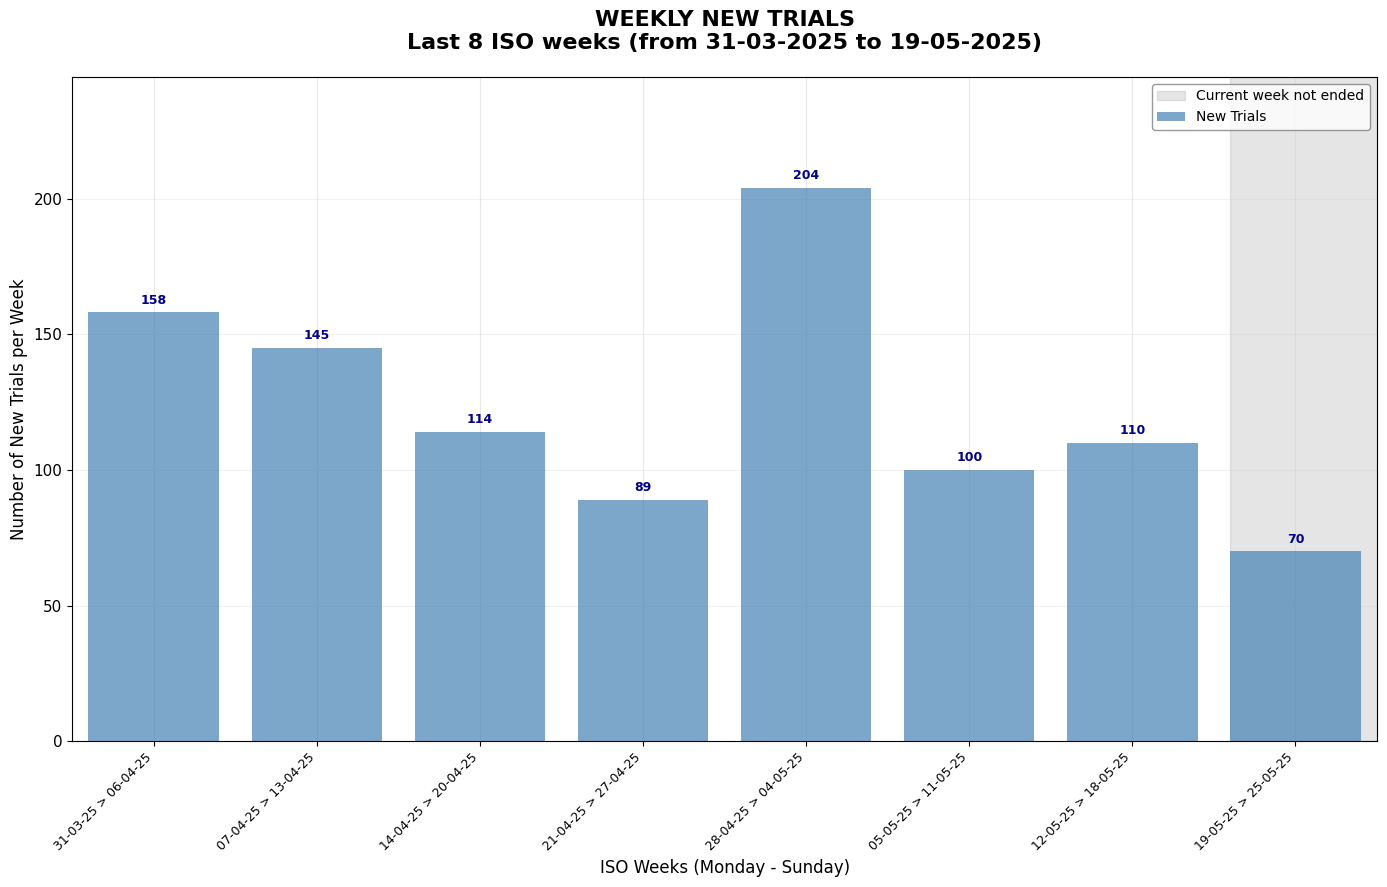

In [200]:
def plot_weekly_trials_8_weeks(sub_df, today_date, today_iso, num_weeks=8):
    """
    Plot the number of new trials each week for the last N weeks (default 8) using standardized ISO calendar
    REFACTORED to use standardized ISO week functions instead of Pandas Grouper
    """

    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    print(f"📊 Creating LAST {num_weeks} WEEKS trials analysis using standardized ISO calendar...")

    # Check if there is data
    if 'trial_start_utc' not in sub_df.columns or sub_df['trial_start_utc'].isna().all():
        print("❌ No trial data found")
        return {}

    # === HELPER FUNCTION TO ADD ISO COLUMNS (Centralized and standardized) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filter valid dates to avoid <NA>
        valid_dates = df[date_column].notna()

        # Initialize columns with default values
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculate only for valid dates
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df


    # Generate the last N ISO weeks correctly with standardized functions
    iso_week_keys = []
    current_year, current_week = today_iso.year, today_iso.week

    for i in range(num_weeks):
        # Add current week
        iso_week_key = f"{current_year}-W{current_week:02d}"
        iso_week_keys.insert(0, iso_week_key)  # Insert at beginning for chronological order

        # Go back one ISO week correctly with get_weeks_in_iso_year
        current_week -= 1
        if current_week <= 0:
            current_year -= 1
            current_week = get_weeks_in_iso_year(current_year)

    print(f"📅 Analysis from {iso_week_keys[0]} to {iso_week_keys[-1]} ({len(iso_week_keys)} ISO weeks)")

    # === PREPARE DATAFRAMES WITH ISO WEEKS ===
    print("🗓️  Adding ISO week columns...")

    # Add ISO columns to trials DataFrame
    trials_with_iso = add_iso_week_columns(sub_df, 'trial_start_utc')

    # === CALCULATE WEEKLY ISO METRICS ===
    # Group by ISO week instead of Pandas Grouper
    weekly_trials = trials_with_iso[trials_with_iso['iso_week_key'].notna()].groupby('iso_week_key').size()

    # === REINDEX TO N WEEKS RANGE ===
    weekly_trials = weekly_trials.reindex(iso_week_keys, fill_value=0)

    # === CREATE WEEK LABELS WITH REAL DATES (USING get_iso_week_bounds) ===
    week_labels = []
    week_dates = []

    for week_key in iso_week_keys:
        try:
            year, week = week_key.split('-W')
            year, week = int(year), int(week)

            # USE STANDARDIZED FUNCTION get_iso_week_bounds
            monday, sunday = get_iso_week_bounds(year, week)

            week_labels.append(f"{monday.strftime('%d-%m-%y')} > {sunday.strftime('%d-%m-%y')}")
            week_dates.append(monday)

        except Exception as e:
            print(f"⚠️  Error processing week {week_key}: {e}")
            week_labels.append(week_key)
            week_dates.append(today_date)  # Fallback

    x_pos = range(len(iso_week_keys))

    # === CREATE CHART - SHORT PERIOD ===
    fig, ax = plt.subplots(1, 1, figsize=(14, 9))

    # === BARPLOT ===
    bars = ax.bar(x_pos, weekly_trials, label='New Trials',
                  color='steelblue', alpha=0.7)

    # Add numbers on bars with protection
    for i, v in enumerate(weekly_trials):
        if v > 0:
            # Protection against empty series
            max_trials = max(weekly_trials) if len(weekly_trials) > 0 and max(weekly_trials) > 0 else 1
            ax.text(i, v + max_trials * 0.01, str(int(v)),
                   ha='center', va='bottom', fontsize=9, color='darkblue', fontweight='bold')

    # === AXIS CONFIGURATION ===
    ax.set_ylabel('Number of New Trials per Week', fontsize=12)
    ax.set_xlabel('ISO Weeks (Monday - Sunday)', fontsize=12)

    # === VISUAL CONFIGURATION ===
    ax.grid(True, alpha=0.3, axis='y')

    # Adjust Y limits with protection
    if len(weekly_trials) > 0 and max(weekly_trials) > 0:
        y_max = max(weekly_trials) * 1.2
        ax.set_ylim(0, y_max)
    else:
        ax.set_ylim(0, 1)

    ax.set_xlim(-0.5, len(x_pos) - 0.5)

    # X-axis configuration - show all labels for short periods
    ax.set_xticks(x_pos)
    ax.set_xticklabels(week_labels, rotation=45, ha='right', fontsize=9)

    # === GRAY ZONE FOR IMMATURE PERIODS (USING calculate_target_iso_week) ===
    # Calculate immature cutoff week (1 week before for trials - most recent)
    immature_year, immature_week, immature_cutoff_key = calculate_target_iso_week(today_iso, weeks_back=0)

    print(f"🔍 Immature cutoff at: {immature_cutoff_key}")

    immature_weeks = []
    for i, week_key in enumerate(iso_week_keys):
        # Compare ISO weeks directly
        if week_key >= immature_cutoff_key:
            immature_weeks.append(i)

    if immature_weeks:
        start_idx = min(immature_weeks) - 0.4
        end_idx = max(immature_weeks) + 0.5
        ax.axvspan(start_idx, end_idx, alpha=0.2, color='gray',
                   label='Current week not ended', zorder=0)
        print(f"🔍 Immature period: {len(immature_weeks)} recent weeks")

    # === TITLES AND LEGENDS ===
    if len(week_dates) > 0:
        start_date = week_dates[0].strftime("%d-%m-%Y")
        end_date = week_dates[-1].strftime("%d-%m-%Y")
        period_text = f'Last {num_weeks} ISO weeks (from {start_date} to {end_date})'
    else:
        period_text = f'Last {num_weeks} ISO weeks'

    ax.set_title(f'WEEKLY NEW TRIALS\n{period_text}',
                 fontsize=16, fontweight='bold', pad=20)

    ax.legend(loc='upper right', fontsize=10)

    # === SUMMARY METRICS ===
    print("=== CALCULATING METRICS ===")

    total_trials = weekly_trials.sum()
    avg_trials = weekly_trials.mean()
    max_trials_value = weekly_trials.max()
    min_trials_value = weekly_trials.min()
    max_week_idx = weekly_trials.idxmax()
    min_week_idx = weekly_trials.idxmin()

    max_week_position = iso_week_keys.index(max_week_idx)
    min_week_position = iso_week_keys.index(min_week_idx)

    max_week_label = week_labels[max_week_position]
    min_week_label = week_labels[min_week_position]

    # Additional metrics
    if len(weekly_trials) >= 2:
        latest_week = weekly_trials.iloc[-1]
        previous_week = weekly_trials.iloc[-2]
        latest_week_text = f"Latest week: {latest_week:,} trials\nPrevious week: {previous_week:,} trials"
        week_over_week_change = latest_week - previous_week
        week_over_week_pct = (week_over_week_change / previous_week * 100) if previous_week > 0 else 0
    else:
        latest_week = weekly_trials.iloc[-1] if len(weekly_trials) > 0 else 0
        previous_week = 0
        latest_week_text = f"Latest week: {latest_week:,} trials\nPrevious week: N/A"
        week_over_week_change = 0
        week_over_week_pct = 0

    # Trend metrics
    if num_weeks >= 4:
        # Average of last 4 weeks
        recent_4w_avg = weekly_trials.iloc[-4:].mean()
        print(f"📈 Total trials ({num_weeks} weeks): {total_trials:,}")
        print(f"📊 Average per week: {avg_trials:.1f}")
        print(f"📊 Recent 4-week average: {recent_4w_avg:.1f}")
    else:
        print(f"📈 Total trials ({num_weeks} weeks): {total_trials:,}")
        print(f"📊 Average per week: {avg_trials:.1f}")

    print(f"📊 Maximum week: {max_trials_value:,}")
    print(f"📊 Minimum week: {min_trials_value:,}")
    print(latest_week_text)

    if len(weekly_trials) >= 2:
        print(f"📊 Week-over-week change: {week_over_week_change:+,} ({week_over_week_pct:+.1f}%)")

    plt.tight_layout()

    # === SAVE ===
    filename = f"weekly_trials_{num_weeks}_weeks_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')

    print(f"📁 Short period chart saved: {filename}")
    plt.show()

    # === ENHANCED RETURN ===
    return {
        'total_trials': total_trials,
        'average_per_week': avg_trials,
        'max_week': max_trials_value,
        'max_week_label': max_week_label,
        'min_week': min_trials_value,
        'min_week_label': min_week_label,
        'latest_week': latest_week,
        'previous_week': previous_week,
        'week_over_week_change': week_over_week_change,
        'week_over_week_pct': week_over_week_pct,
        'num_weeks': num_weeks,
        'weekly_data': weekly_trials.tolist(),
        'weekly_trials_series': weekly_trials,
        'iso_week_keys': iso_week_keys,
        'week_labels': week_labels,
        'week_dates': week_dates,
        'recent_4w_avg': recent_4w_avg
    }


# Usage
trials_metrics_8w = plot_weekly_trials_8_weeks(sub_df, today_date, today_iso, num_weeks=8)

📊 Creating ALL TIME weekly trials analysis using standardized ISO calendar...
Analysis since first date: 25-09-2023
🗓️  Adding ISO week columns...
📅 Analysis from 2023-W39 to 2025-W21 (87 ISO weeks)
🔍 Immature cutoff at: 2025-W21
🔍 Immature period: 1 recent weeks
=== CALCULATING METRICS ===
📈 Total trials (all time): 18,106
📊 Average per week: 208.1
📊 Maximum week: 768
📊 Minimum week: 70
📊 Number of weeks analyzed: 87
Latest week: 70 trials
Previous week: 110 trials
📊 Week-over-week change: -40 (-36.4%)
📁 All time chart saved: weekly_trials_all_time_2025-05-23.png


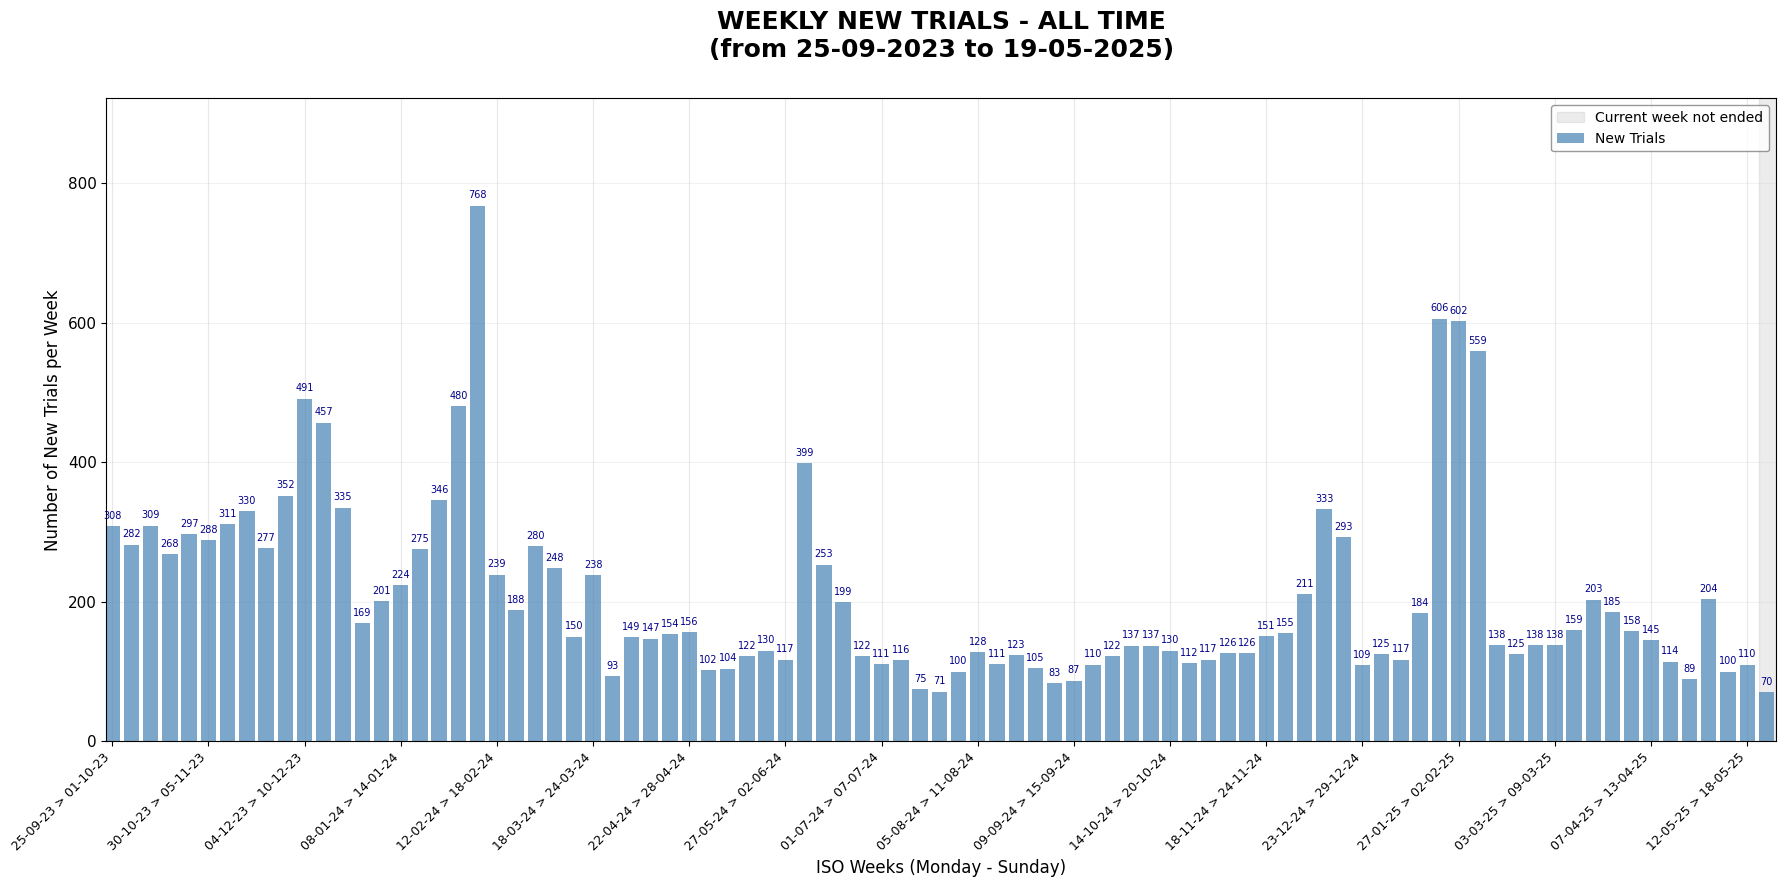

In [201]:
def plot_weekly_trials_all_time(sub_df, today_date, today_iso):
    """
    Plot the number of new trials each week since the beginning using standardized ISO calendar
    REFACTORED to use standardized ISO week functions instead of Pandas Grouper
    """

    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    # Check if there is data
    if 'trial_start_utc' not in sub_df.columns or sub_df['trial_start_utc'].isna().all():
        print("❌ No trial data found")
        return {}

    first_date = sub_df['trial_start_utc'].min()
    if pd.isna(first_date):
        print("❌ No trial data found")
        return {}

    print(f"📊 Creating ALL TIME weekly trials analysis using standardized ISO calendar...")
    print(f"Analysis since first date: {first_date.strftime('%d-%m-%Y')}")

    # === HELPER FUNCTION TO ADD ISO COLUMNS (Centralized and standardized) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filter valid dates to avoid <NA>
        valid_dates = df[date_column].notna()

        # Initialize columns with default values
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculate only for valid dates
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df

    # === PREPARE DATAFRAMES WITH ISO WEEKS ===
    print("🗓️  Adding ISO week columns...")

    # Add ISO columns to trials DataFrame
    trials_with_iso = add_iso_week_columns(sub_df, 'trial_start_utc')

    # === CALCULATE WEEKLY ISO METRICS ===
    # Group by ISO week instead of Pandas Grouper
    weekly_trials = trials_with_iso[trials_with_iso['iso_week_key'].notna()].groupby('iso_week_key').size()

    # Check if there is data after grouping
    if len(weekly_trials) == 0:
        print("❌ No trial data found after ISO grouping")
        return {}

    # === DETERMINE COMPLETE RANGE OF ISO WEEKS ===
    all_iso_weeks = weekly_trials.index.tolist()

    # === USE STANDARDIZED ISO SORTING FUNCTION ===
    def sort_iso_weeks(week_keys):
        """Sort ISO week keys using standardized parsing"""
        def parse_week(week_key):
            try:
                if pd.isna(week_key) or week_key == '<NA>' or not isinstance(week_key, str):
                    return (0, 0)
                year, week = week_key.split('-W')
                return (int(year), int(week))
            except (ValueError, AttributeError):
                print(f"⚠️  Invalid week key ignored: {week_key}")
                return (0, 0)

        valid_weeks = [week for week in week_keys
                      if pd.notna(week) and week != '<NA>' and isinstance(week, str) and '-W' in str(week)]
        return sorted(valid_weeks, key=parse_week)

    sorted_iso_weeks = sort_iso_weeks(all_iso_weeks)

    if not sorted_iso_weeks:
        print("❌ No valid ISO weeks after filtering")
        return {}

    # Get start and end dates for display
    first_week_key = sorted_iso_weeks[0]
    last_week_key = sorted_iso_weeks[-1]
    num_weeks = len(sorted_iso_weeks)

    print(f"📅 Analysis from {first_week_key} to {last_week_key} ({num_weeks} ISO weeks)")

    # === REINDEX SERIES TO COMPLETE RANGE ===
    weekly_trials = weekly_trials.reindex(sorted_iso_weeks, fill_value=0)

    # === CREATE WEEK LABELS WITH REAL DATES (USING get_iso_week_bounds) ===
    week_labels = []
    week_dates = []

    for week_key in sorted_iso_weeks:
        try:
            year, week = week_key.split('-W')
            year, week = int(year), int(week)

            # USE STANDARDIZED FUNCTION get_iso_week_bounds
            monday, sunday = get_iso_week_bounds(year, week)

            week_labels.append(f"{monday.strftime('%d-%m-%y')} > {sunday.strftime('%d-%m-%y')}")
            week_dates.append(monday)

        except Exception as e:
            print(f"⚠️  Error processing week {week_key}: {e}")
            week_labels.append(week_key)
            week_dates.append(today_date)  # Fallback

    x_pos = range(len(sorted_iso_weeks))

    # === CREATE CHART - ALL TIME ===
    fig, ax = plt.subplots(1, 1, figsize=(18, 9))

    # === BARPLOT ===
    bars = ax.bar(x_pos, weekly_trials, label='New Trials',
                  color='steelblue', alpha=0.7)

    # Add numbers on bars with protection
    for i, v in enumerate(weekly_trials):
        if v > 0:
            max_trials = max(weekly_trials) if len(weekly_trials) > 0 and max(weekly_trials) > 0 else 1
            ax.text(i, v + max_trials * 0.01, str(int(v)),
                   ha='center', va='bottom', fontsize=7, color='darkblue')

    # === AXIS CONFIGURATION ===
    ax.set_ylabel('Number of New Trials per Week', fontsize=12)
    ax.set_xlabel('ISO Weeks (Monday - Sunday)', fontsize=12)

    # === VISUAL CONFIGURATION ===
    ax.grid(True, alpha=0.3, axis='y')

    # Adjust Y limits with protection
    if len(weekly_trials) > 0 and max(weekly_trials) > 0:
        y_max = max(weekly_trials) * 1.2
        ax.set_ylim(0, y_max)
    else:
        ax.set_ylim(0, 1)

    ax.set_xlim(-0.3, len(x_pos) - 0.5)

    # X-axis configuration - reduce labels for long periods
    step = max(1, len(x_pos) // 15)
    ax.set_xticks(x_pos[::step])
    ax.set_xticklabels([week_labels[i] for i in x_pos[::step]],
                       rotation=45, ha='right', fontsize=9)


    # Calculate immature cutoff week (1 week before for trials - most recent)
    immature_year, immature_week, immature_cutoff_key = calculate_target_iso_week(today_iso, weeks_back=0)

    print(f"🔍 Immature cutoff at: {immature_cutoff_key}")

    immature_weeks = []
    for i, week_key in enumerate(sorted_iso_weeks):
        # Compare ISO weeks directly
        if week_key >= immature_cutoff_key:
            immature_weeks.append(i)

    if immature_weeks:
        start_idx = min(immature_weeks) - 0.4
        end_idx = max(immature_weeks) + 0.5
        ax.axvspan(start_idx, end_idx, alpha=0.15, color='gray',
                   label='Current week not ended', zorder=0)
        print(f"🔍 Immature period: {len(immature_weeks)} recent weeks")

    # === TITLES AND LEGENDS ===
    start_date = week_dates[0].strftime("%d-%m-%Y") if week_dates else "N/A"
    end_date = week_dates[-1].strftime("%d-%m-%Y") if week_dates else "N/A"
    period_text = f'(from {start_date} to {end_date})'
    ax.set_title(f'WEEKLY NEW TRIALS - ALL TIME\n{period_text}',
                 fontsize=18, fontweight='bold', pad=30)

    ax.legend(loc='upper right', fontsize=10)

    # === SUMMARY METRICS ===
    print("=== CALCULATING METRICS ===")

    total_trials = weekly_trials.sum()
    avg_trials = weekly_trials.mean()
    max_trials_value = weekly_trials.max()
    min_trials_value = weekly_trials.min()
    max_week_idx = weekly_trials.idxmax()
    min_week_idx = weekly_trials.idxmin()

    max_week_position = sorted_iso_weeks.index(max_week_idx)
    min_week_position = sorted_iso_weeks.index(min_week_idx)

    max_week_label = week_labels[max_week_position]
    min_week_label = week_labels[min_week_position]

    # Additional metrics
    if len(weekly_trials) >= 2:
        latest_week = weekly_trials.iloc[-1]
        previous_week = weekly_trials.iloc[-2]
        latest_week_text = f"Latest week: {latest_week:,} trials\nPrevious week: {previous_week:,} trials"
        week_over_week_change = latest_week - previous_week
        week_over_week_pct = (week_over_week_change / previous_week * 100) if previous_week > 0 else 0
    else:
        latest_week = weekly_trials.iloc[-1] if len(weekly_trials) > 0 else 0
        latest_week_text = f"Latest week: {latest_week:,} trials\nPrevious week: N/A"
        week_over_week_change = 0
        week_over_week_pct = 0

    print(f"📈 Total trials (all time): {total_trials:,}")
    print(f"📊 Average per week: {avg_trials:.1f}")
    print(f"📊 Maximum week: {max_trials_value:,}")
    print(f"📊 Minimum week: {min_trials_value:,}")
    print(f"📊 Number of weeks analyzed: {num_weeks:,}")
    print(latest_week_text)
    if len(weekly_trials) >= 2:
        print(f"📊 Week-over-week change: {week_over_week_change:+,} ({week_over_week_pct:+.1f}%)")

    plt.tight_layout()

    # === SAVE ===
    filename = f"weekly_trials_all_time_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')

    print(f"📁 All time chart saved: {filename}")
    plt.show()

    # === ENHANCED RETURN ===
    return {
        'total_trials': total_trials,
        'average_per_week': avg_trials,
        'max_week': max_trials_value,
        'max_week_label': max_week_label,
        'min_week': min_trials_value,
        'min_week_label': min_week_label,
        'latest_week': latest_week,
        'previous_week': previous_week if len(weekly_trials) >= 2 else 0,
        'week_over_week_change': week_over_week_change,
        'week_over_week_pct': week_over_week_pct,
        'num_weeks': num_weeks,
        'weekly_data': weekly_trials.tolist(),
        'weekly_trials_series': weekly_trials,
        'iso_weeks': sorted_iso_weeks,
        'week_dates': week_dates,
        'first_week_key': first_week_key,
        'last_week_key': last_week_key
    }


# Usage
trials_metrics_all = plot_weekly_trials_all_time(sub_df, today_date, today_iso)

📊 Creating LAST 8 WEEKS flow analysis using standardized ISO calendar...
📅 Analysis from 2025-W14 to 2025-W21 (8 ISO weeks)
🗓️  Adding ISO week columns...
🔍 Immature cutoff at: 2025-W21
🔍 Immature period: 1 recent weeks
=== CALCULATING METRICS ===
📈 Total conversions (8 weeks): 789
📉 Total churn (8 weeks): 172
🎯 Net growth (8 weeks): 617
📊 Avg conversions per week: 98.6
📊 Avg churn per week: 21.5
📁 Short period chart saved: weekly_flow_8_weeks_2025-05-23.png


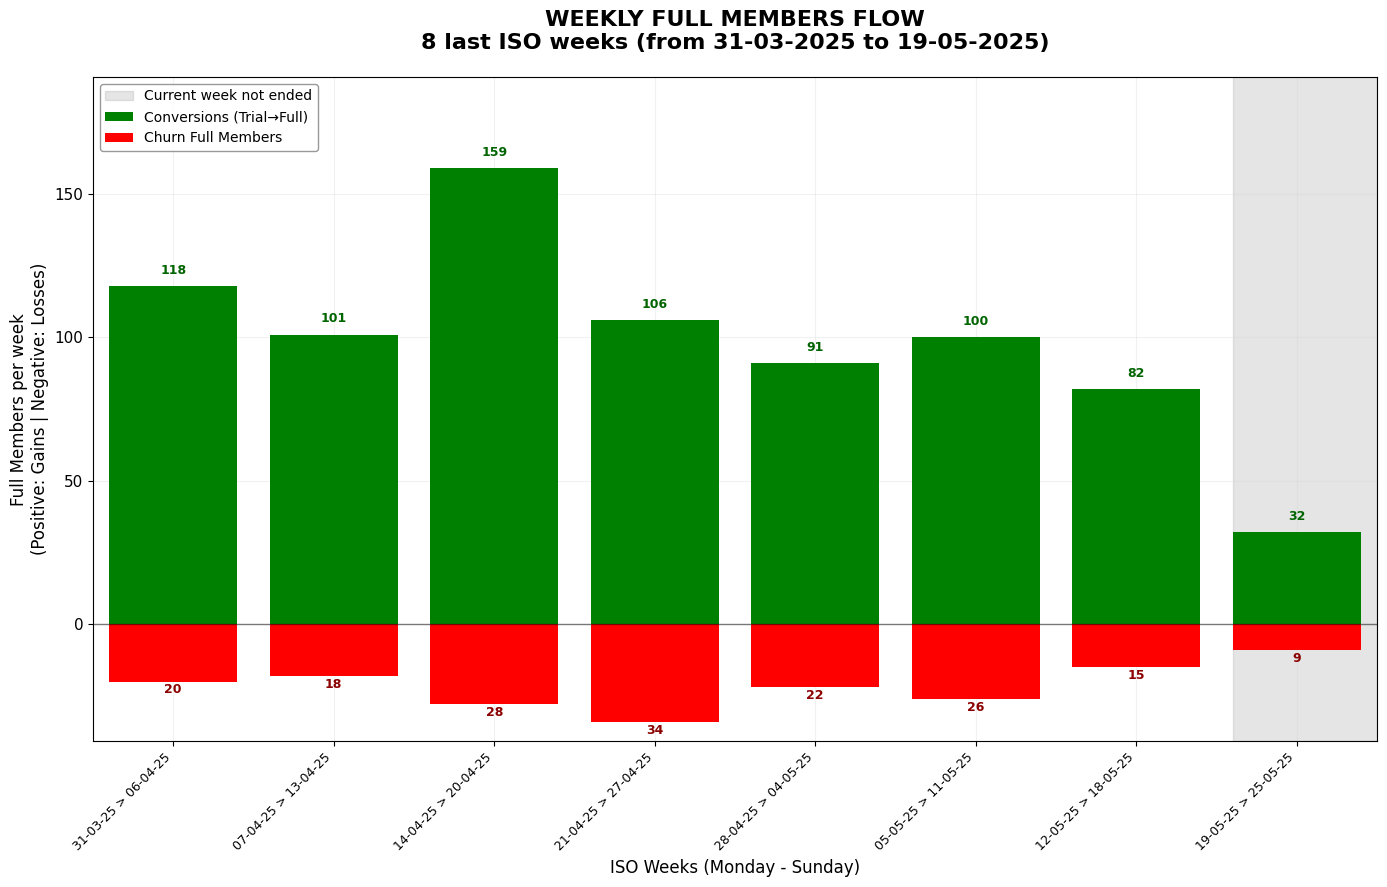

In [202]:
def weekly_flow_8_weeks(sub_df, today_date, today_iso, num_weeks=8):
    """
    Create a chart with weekly metrics for last N weeks (default 8) using standardized ISO calendar
    North: Conversions (Trial→Full)
    South: Churn full members
    Focus: Full members only (no renewals)

    REFACTORED to use standardized ISO week functions and fix hybrid calculation issues
    """

    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    # Get renewal data (for consistency with weekly_flow_all_time)
    renewal_dict = cus_renewal(sub_df)
    trial_to_full_member_df = renewal_dict['trial_to_full_member_df']

    full_member_churn_df = renewal_dict['trial_to_full_member_df']
    full_member_churn_df = full_member_churn_df[full_member_churn_df['is_full_member'] == True]

    print(f"📊 Creating LAST {num_weeks} WEEKS flow analysis using standardized ISO calendar...")

    # === HELPER FUNCTION TO ADD ISO COLUMNS (Centralized and standardized) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filter valid dates to avoid <NA>
        valid_dates = df[date_column].notna()

        # Initialize columns with default values
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculate only for valid dates
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df


    # Generate the last N ISO weeks correctly with calculate_target_iso_week
    iso_weeks = []
    current_year, current_week = today_iso.year, today_iso.week

    for i in range(num_weeks):
        # Add current week
        iso_week_key = f"{current_year}-W{current_week:02d}"
        iso_weeks.insert(0, iso_week_key)  # Insert at beginning for chronological order

        # Go back one ISO week correctly
        current_week -= 1
        if current_week <= 0:
            current_year -= 1
            current_week = get_weeks_in_iso_year(current_year)

    print(f"📅 Analysis from {iso_weeks[0]} to {iso_weeks[-1]} ({len(iso_weeks)} ISO weeks)")

    # === PREPARE DATAFRAMES WITH ISO WEEKS ===
    print("🗓️  Adding ISO week columns...")

    # Conversions (account creations)
    conversion_customers = add_iso_week_columns(trial_to_full_member_df, 'refund_period_end_utc')

    # Churn (cancellations)
    churn_customers = add_iso_week_columns(full_member_churn_df.copy(), 'canceled_at_utc')

    # === CALCULATE WEEKLY ISO METRICS ===
    # Filter valid data before groupby
    weekly_conversions = conversion_customers[conversion_customers['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_churn = churn_customers[churn_customers['iso_week_key'].notna()].groupby('iso_week_key').size()

    # === REINDEX ALL SERIES TO N WEEKS RANGE ===
    weekly_conversions = weekly_conversions.reindex(iso_weeks, fill_value=0)
    weekly_churn = weekly_churn.reindex(iso_weeks, fill_value=0)

    # === CREATE WEEK LABELS WITH REAL DATES (USING get_iso_week_bounds) ===
    week_labels = []
    week_dates = []

    for week_key in iso_weeks:
        try:
            year, week = week_key.split('-W')
            year, week = int(year), int(week)

            # USE STANDARDIZED FUNCTION get_iso_week_bounds
            monday, sunday = get_iso_week_bounds(year, week)

            week_labels.append(f"{monday.strftime('%d-%m-%y')} > {sunday.strftime('%d-%m-%y')}")
            week_dates.append(monday)

        except Exception as e:
            print(f"⚠️  Error processing week {week_key}: {e}")
            week_labels.append(week_key)
            week_dates.append(today_date)  # Fallback

    x_pos = range(len(iso_weeks))

    # === CREATE CHART - SHORT PERIOD ===
    fig, ax = plt.subplots(1, 1, figsize=(14, 9))

    # === POSITIVE BARPLOT (NORTH) ===
    ax.bar(x_pos, weekly_conversions, label='Conversions (Trial→Full)', color='green')

    # === NEGATIVE BARPLOT (SOUTH) ===
    ax.bar(x_pos, -weekly_churn, label='Churn Full Members', color='red')

    # === AXIS CONFIGURATION ===
    ax.set_ylabel('Full Members per week\n(Positive: Gains | Negative: Losses)', fontsize=12)
    ax.set_xlabel('ISO Weeks (Monday - Sunday)', fontsize=12)

    # === ADD VALUE LABELS (IMPROVED) ===
    for i, (conv, churn) in enumerate(zip(weekly_conversions, weekly_churn)):
        if conv > 0:
            # Protection against empty series
            max_conv = max(weekly_conversions) if len(weekly_conversions) > 0 and max(weekly_conversions) > 0 else 1
            ax.text(i, conv + max_conv * 0.02, str(int(conv)),
                   ha='center', va='bottom', fontsize=9, color='darkgreen', fontweight='bold')

        if churn > 0:
            # Protection against empty series
            max_churn = max(weekly_churn) if len(weekly_churn) > 0 and max(weekly_churn) > 0 else 1
            ax.text(i, -churn - max_churn * 0.02, str(int(churn)),
                   ha='center', va='top', fontsize=9, color='darkred', fontweight='bold')

    # === VISUAL CONFIGURATION ===
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.5, len(x_pos) - 0.5)

    # Adjust Y limits with protection
    if len(weekly_conversions) > 0 and max(weekly_conversions) > 0:
        y_max = max(weekly_conversions) * 1.2
    else:
        y_max = 1

    if len(weekly_churn) > 0 and max(weekly_churn) > 0:
        y_min = -max(weekly_churn) * 1.2
    else:
        y_min = -1

    ax.set_ylim(y_min, y_max)

    # X-axis configuration - show all labels for short periods
    ax.set_xticks(x_pos)
    ax.set_xticklabels(week_labels, rotation=45, ha='right', fontsize=9)

    # === GRAY ZONE FOR IMMATURE PERIODS (USING calculate_target_iso_week) ===
    # Calculate immature cutoff week (4 weeks before for conversions)
    immature_year, immature_week, immature_cutoff_key = calculate_target_iso_week(today_iso, weeks_back=0)

    print(f"🔍 Immature cutoff at: {immature_cutoff_key}")

    immature_weeks = []
    for i, week_key in enumerate(iso_weeks):
        # Compare ISO weeks directly
        if week_key >= immature_cutoff_key:
            immature_weeks.append(i)

    if immature_weeks:
        start_idx = min(immature_weeks) - 0.4
        end_idx = max(immature_weeks) + 0.5
        ax.axvspan(start_idx, end_idx, alpha=0.2, color='gray',
                   label='Current week not ended', zorder=0)
        print(f"🔍 Immature period: {len(immature_weeks)} recent weeks")

    # === TITLES AND LEGENDS ===
    if len(week_dates) > 0:
        start_date = week_dates[0].strftime("%d-%m-%Y")
        end_date = week_dates[-1].strftime("%d-%m-%Y")
        period_text = f'{num_weeks} last ISO weeks (from {start_date} to {end_date})'
    else:
        period_text = f'{num_weeks} last ISO weeks'

    ax.set_title(f'WEEKLY FULL MEMBERS FLOW\n{period_text}',
                 fontsize=16, fontweight='bold', pad=20)

    # Legends
    lines1, labels1 = ax.get_legend_handles_labels()
    ax.legend(lines1, labels1, loc='best', fontsize=10)

    # === SUMMARY METRICS ===
    print("=== CALCULATING METRICS ===")

    total_conversions = weekly_conversions.sum()
    total_churn = weekly_churn.sum()
    net_growth = total_conversions - total_churn

    # Additional metrics for consistency
    avg_conversions_per_week = total_conversions / num_weeks if num_weeks > 0 else 0
    avg_churn_per_week = total_churn / num_weeks if num_weeks > 0 else 0
    avg_net_growth = (total_conversions - total_churn) / num_weeks if num_weeks > 0 else 0

    # === FIND MAX/MIN WEEKS FOR CONVERSIONS ===
    max_conv_value = weekly_conversions.max()
    min_conv_value = weekly_conversions.min()
    max_conv_idx = weekly_conversions.idxmax()
    min_conv_idx = weekly_conversions.idxmin()

    max_conv_position = iso_weeks.index(max_conv_idx)
    min_conv_position = iso_weeks.index(min_conv_idx)

    max_conv_label = week_labels[max_conv_position]
    min_conv_label = week_labels[min_conv_position]

    # === FIND MAX/MIN WEEKS FOR CHURN ===
    max_churn_value = weekly_churn.max()
    min_churn_value = weekly_churn.min()
    max_churn_idx = weekly_churn.idxmax()
    min_churn_idx = weekly_churn.idxmin()

    max_churn_position = iso_weeks.index(max_churn_idx)
    min_churn_position = iso_weeks.index(min_churn_idx)

    max_churn_label = week_labels[max_churn_position]
    min_churn_label = week_labels[min_churn_position]

    print(f"📈 Total conversions ({num_weeks} weeks): {total_conversions:,}")
    print(f"📉 Total churn ({num_weeks} weeks): {total_churn:,}")
    print(f"🎯 Net growth ({num_weeks} weeks): {net_growth:,}")
    print(f"📊 Avg conversions per week: {avg_conversions_per_week:.1f}")
    print(f"📊 Avg churn per week: {avg_churn_per_week:.1f}")

    plt.tight_layout()

    # === SAVE ===
    filename = f"weekly_flow_{num_weeks}_weeks_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')
    print(f"📁 Short period chart saved: {filename}")
    plt.show()

    # === ENHANCED RETURN ===
    return {
        'conversions': total_conversions,
        'churn': total_churn,
        'net_growth': net_growth,
        'num_weeks': num_weeks,
        'avg_conversions_per_week': avg_conversions_per_week,
        'avg_churn_per_week': avg_churn_per_week,
        'weekly_conversions': weekly_conversions,
        'weekly_churn': weekly_churn,
        'iso_weeks': iso_weeks,
        'week_dates': week_dates,
        'avg_net_growth': avg_net_growth,
        'max_churn_label': max_churn_label,
        'max_churn_value': max_churn_value,
        'min_churn_label': min_churn_label,
        'min_churn_value': min_churn_value,
        'min_conv_value': min_conv_value,
        'min_conv_label': min_conv_label,
        'max_conv_value': max_conv_value,
        'max_conv_label': max_conv_label
    }


# === USAGE ===
metrics_8w = weekly_flow_8_weeks(sub_df, today_date, today_iso, num_weeks=8)

📊 Creating ALL TIME weekly flow analysis using standardized ISO calendar...
🗓️  Adding ISO week columns...
📅 Analysis from 2023-W43 to 2025-W21 (81 ISO weeks)
🔍 Immature cutoff at: 2025-W21
🔍 Immature period: 1 recent weeks
=== CALCULATING METRICS ===
📈 Total conversions (all time): 7,459
📉 Total churn (all time): 2,158
🎯 Net growth (all time): 5,301
📊 Final cumulative: 5,301
📁 All time chart saved: weekly_flow_all_time_2025-05-23.png


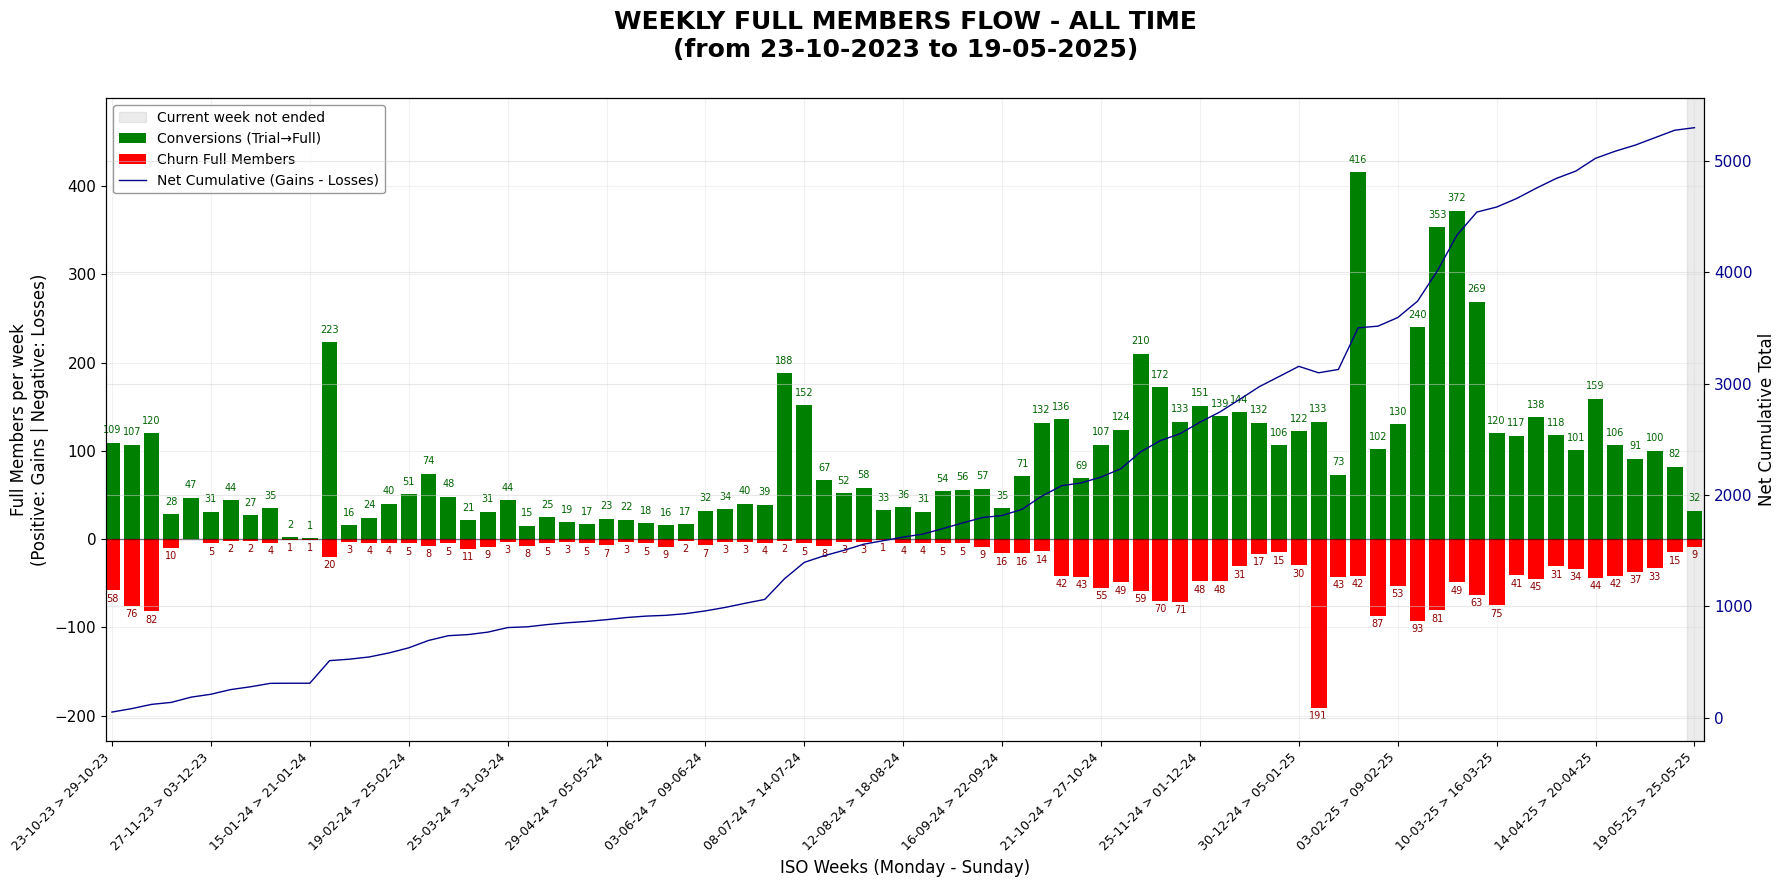

In [203]:
def weekly_flow_all_time(sub_df, today_date, today_iso):
    """
    Create a dual-axis chart with weekly metrics for ALL TIME using ISO calendar
    North: Conversions (Trial→Full)
    South: Churn full members
    + Cumulative line plot

    REFACTORED to use standardized ISO week functions
    """

    # Obtain renewal data
    renewal_dict = cus_renewal(sub_df)
    trial_to_full_member_df = renewal_dict['trial_to_full_member_df']

    print("📊 Creating ALL TIME weekly flow analysis using standardized ISO calendar...")

    # === HELPER FUNCTION TO ADD ISO COLUMNS (Centralized) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filter valid dates to avoid <NA>
        valid_dates = df[date_column].notna()

        # Initialize columns with default values
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculate only for valid dates
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df

    # === PREPARE DATAFRAMES WITH ISO WEEKS ===
    print("🗓️  Adding ISO week columns...")

    # Conversions (account creations)
    conversion_customers = add_iso_week_columns(trial_to_full_member_df, 'refund_period_end_utc')

    # Churn (cancellations)
    churn_customers = add_iso_week_columns(trial_to_full_member_df.copy(), 'canceled_at_utc')

    # === CALCULATE WEEKLY ISO METRICS ===
    # Filter valid data before groupby
    weekly_conversions = conversion_customers[conversion_customers['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_churn = churn_customers[churn_customers['iso_week_key'].notna()].groupby('iso_week_key').size()

    # === DETERMINE FULL RANGE OF ISO WEEKS ===
    all_iso_weeks = set()

    for series in [weekly_conversions, weekly_churn]:
        if len(series) > 0:
            all_iso_weeks.update(series.index.tolist())

    if not all_iso_weeks:
        print("❌ No data found")
        return {}

    # === USE STANDARDIZED ISO SORT FUNCTION ===
    def sort_iso_weeks(week_keys):
        """Sort ISO week keys using standardized parsing"""
        def parse_week(week_key):
            try:
                year, week = week_key.split('-W')
                return (int(year), int(week))
            except (ValueError, AttributeError):
                print(f"⚠️  Invalid week key ignored: {week_key}")
                return (0, 0)

        # Filter valid week keys
        valid_weeks = [week for week in week_keys
                      if pd.notna(week) and isinstance(week, str) and '-W' in str(week)]
        return sorted(valid_weeks, key=parse_week)

    sorted_iso_weeks = sort_iso_weeks(list(all_iso_weeks))

    if not sorted_iso_weeks:
        print("❌ No valid ISO weeks after filtering")
        return {}

    # Obtain start and end dates for display
    first_week_key = sorted_iso_weeks[0]
    last_week_key = sorted_iso_weeks[-1]

    print(f"📅 Analysis from {first_week_key} to {last_week_key} ({len(sorted_iso_weeks)} ISO weeks)")

    # === REINDEX ALL SERIES TO FULL RANGE ===
    weekly_conversions = weekly_conversions.reindex(sorted_iso_weeks, fill_value=0)
    weekly_churn = weekly_churn.reindex(sorted_iso_weeks, fill_value=0)

    # === CREATE WEEK LABELS WITH TRUE DATES (USING get_iso_week_bounds) ===
    week_labels = []
    week_dates = []

    for week_key in sorted_iso_weeks:
        try:
            year, week = week_key.split('-W')
            year, week = int(year), int(week)

            # USE STANDARDIZED get_iso_week_bounds FUNCTION
            monday, sunday = get_iso_week_bounds(year, week)

            week_labels.append(f"{monday.strftime('%d-%m-%y')} > {sunday.strftime('%d-%m-%y')}")
            week_dates.append(monday)

        except Exception as e:
            print(f"⚠️  Error processing week {week_key}: {e}")
            week_labels.append(week_key)
            week_dates.append(today_date)  # Fallback

    x_pos = range(len(sorted_iso_weeks))

    # === CALCULATE NET AND CUMULATIVE CHANGES ===
    net_weekly = weekly_conversions - weekly_churn
    net_cumulative = net_weekly.cumsum()

    # === CREATE THE CHART - ALL TIME ===
    fig, ax = plt.subplots(1, 1, figsize=(18, 9))

    # === POSITIVE BARPLOT (NORTH) ===
    ax.bar(x_pos, weekly_conversions, label='Conversions (Trial→Full)', color='green')

    # === NEGATIVE BARPLOT (SOUTH) ===
    ax.bar(x_pos, -weekly_churn, label='Churn Full Members', color='red')

    # === CUMULATIVE LINE ===
    ax_twin = ax.twinx()
    ax_twin.plot(x_pos, net_cumulative, color='darkblue', linewidth=1,
                 label='Net Cumulative (Gains - Losses)')

    # === AXIS(pm) AXIS CONFIGURATION ===
    ax.set_ylabel('Full Members per week\n(Positive: Gains | Negative: Losses)', fontsize=12)
    ax.set_xlabel('ISO Weeks (Monday - Sunday)', fontsize=12)

    # === ADD VALUE LABELS ===
    for i, (conv, churn) in enumerate(zip(weekly_conversions, weekly_churn)):
        if conv > 0:
            ax.text(i, conv + max(weekly_conversions) * 0.02, str(int(conv)),
                   ha='center', va='bottom', fontsize=7, color='darkgreen')

        if churn > 0:
            ax.text(i, -churn - max(weekly_churn) * 0.02, str(int(churn)),
                   ha='center', va='top', fontsize=7, color='darkred')

    ax_twin.set_ylabel('Net Cumulative Total', fontsize=12)
    ax_twin.tick_params(axis='y', labelcolor='darkblue')

    # === VISUAL CONFIGURATION ===
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax.grid(True, alpha=0.3)

    ax.set_xlim(-0.3, len(x_pos) - 0.5)

    # Adjust Y limits with protection against empty series
    if len(weekly_conversions) > 0 and max(weekly_conversions) > 0:
        y_max = max(weekly_conversions) * 1.2
    else:
        y_max = 1

    if len(weekly_churn) > 0 and max(weekly_churn) > 0:
        y_min = -max(weekly_churn) * 1.2
    else:
        y_min = -1

    ax.set_ylim(y_min, y_max)

    # X-axis configuration - reduce labels for long periods
    step = max(1, len(x_pos) // 15)
    ax.set_xticks(x_pos[::step])
    ax.set_xticklabels([week_labels[i] for i in x_pos[::step]],
                       rotation=45, ha='right', fontsize=9)

    # Calculate immature cutoff week (4 weeks prior)
    immature_year, immature_week, immature_cutoff_key = calculate_target_iso_week(today_iso, weeks_back=0)

    print(f"🔍 Immature cutoff at: {immature_cutoff_key}")

    immature_weeks = []
    for i, week_key in enumerate(sorted_iso_weeks):
        # Compare ISO weeks directly
        if week_key == immature_cutoff_key:
            immature_weeks.append(i)

    if immature_weeks:
        start_idx = min(immature_weeks) - 0.4
        end_idx = max(immature_weeks) + 0.5
        ax.axvspan(start_idx, end_idx, alpha=0.15, color='gray',
                   label='Current week not ended', zorder=0)
        print(f"🔍 Immature period: {len(immature_weeks)} recent weeks")

    # === TITLES AND LEGENDS ===
    start_date = week_dates[0].strftime("%d-%m-%Y") if week_dates else "N/A"
    end_date = week_dates[-1].strftime("%d-%m-%Y") if week_dates else "N/A"
    period_text = f'(from {start_date} to {end_date})'
    ax.set_title(f'WEEKLY FULL MEMBERS FLOW - ALL TIME\n{period_text}',
                 fontsize=18, fontweight='bold', pad=30)

    # Combine legends
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax_twin.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=10)

    # === SUMMARY METRICS ===
    print("=== CALCULATING METRICS ===")

    total_conversions = weekly_conversions.sum()
    total_churn = weekly_churn.sum()
    net_growth = total_conversions - total_churn
    final_cumulative = net_cumulative.iloc[-1] if len(net_cumulative) > 0 else 0
    num_weeks = len(sorted_iso_weeks)

    # Additional metrics for consistency
    avg_conversions_per_week = total_conversions / num_weeks if num_weeks > 0 else 0
    avg_churn_per_week = total_churn / num_weeks if num_weeks > 0 else 0
    avg_net_per_week = net_growth / num_weeks if num_weeks > 0 else 0

    # === FIND MAX/MIN WEEKS FOR CONVERSIONS ===
    max_conv_value = weekly_conversions.max()
    min_conv_value = weekly_conversions.min()
    max_conv_idx = weekly_conversions.idxmax()
    min_conv_idx = weekly_conversions.idxmin()

    max_conv_position = sorted_iso_weeks.index(max_conv_idx)
    min_conv_position = sorted_iso_weeks.index(min_conv_idx)

    max_conv_label = week_labels[max_conv_position]
    min_conv_label = week_labels[min_conv_position]

    # === FIND MAX/MIN WEEKS FOR CHURN ===
    max_churn_value = weekly_churn.max()
    min_churn_value = weekly_churn.min()
    max_churn_idx = weekly_churn.idxmax()
    min_churn_idx = weekly_churn.idxmin()

    max_churn_position = sorted_iso_weeks.index(max_churn_idx)
    min_churn_position = sorted_iso_weeks.index(min_churn_idx)

    max_churn_label = week_labels[max_churn_position]
    min_churn_label = week_labels[min_churn_position]

    print(f"📈 Total conversions (all time): {total_conversions:,}")
    print(f"📉 Total churn (all time): {total_churn:,}")
    print(f"🎯 Net growth (all time): {net_growth:,}")
    print(f"📊 Final cumulative: {final_cumulative:,}")

    plt.tight_layout()

    # === SAVE ===
    filename = f"weekly_flow_all_time_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')
    print(f"📁 All time chart saved: {filename}")
    plt.show()

    # === RETURN DATA ===
    return {
        'total_conversions': total_conversions,
        'total_churn': total_churn,
        'net_growth': net_growth,
        'final_cumulative': final_cumulative,
        'weekly_conversions': weekly_conversions,
        'weekly_churn': weekly_churn,
        'net_cumulative': net_cumulative,
        'iso_weeks': sorted_iso_weeks,
        'week_dates': week_dates,
        'num_weeks': len(sorted_iso_weeks),
        'avg_conversions_per_week': avg_conversions_per_week,
        'avg_churn_per_week': avg_churn_per_week,
        'avg_net_per_week': avg_net_per_week,
        'max_churn_label': max_churn_label,
        'max_churn_value': max_churn_value,
        'min_churn_label': min_churn_label,
        'min_churn_value': min_churn_value,
        'min_conv_value': min_conv_value,
        'min_conv_label': min_conv_label,
        'max_conv_value': max_conv_value,
        'max_conv_label': max_conv_label
    }

# === USAGE ===
weekly_flow_all_time_result = weekly_flow_all_time(sub_df, today_date, today_iso)

📊 Creating RENEWAL-FOCUSED analysis for last 8 ISO weeks using standardized functions...
📅 Analyzing ISO weeks: 2025-W14 to 2025-W21
🗓️  Adding ISO week columns...
📈 Calculating renewal metrics...
🔍 Immature cutoff at: 2025-W21
🔍 Immature period: 1 recent weeks

=== CALCULATING RENEWAL METRICS ===
📈 Total Y1→Y2 renewals (8 weeks): 246
📈 Total Y2→Y3 renewals (8 weeks): 0
📈 Total renewals (8 weeks): 246
📉 Total post-renewal churn (8 weeks): 46
📉 Total refund churn (8 weeks): 35
📉 Total churn (8 weeks): 81
🎯 Net renewal growth (8 weeks): 165
📊 Avg renewals per week: 30.8
📊 Avg churn per week: 10.1
📊 Renewal churn rate: 32.9%
📁 Renewal flow chart saved: weekly_renewal_flow_8_weeks_2025-05-23.png


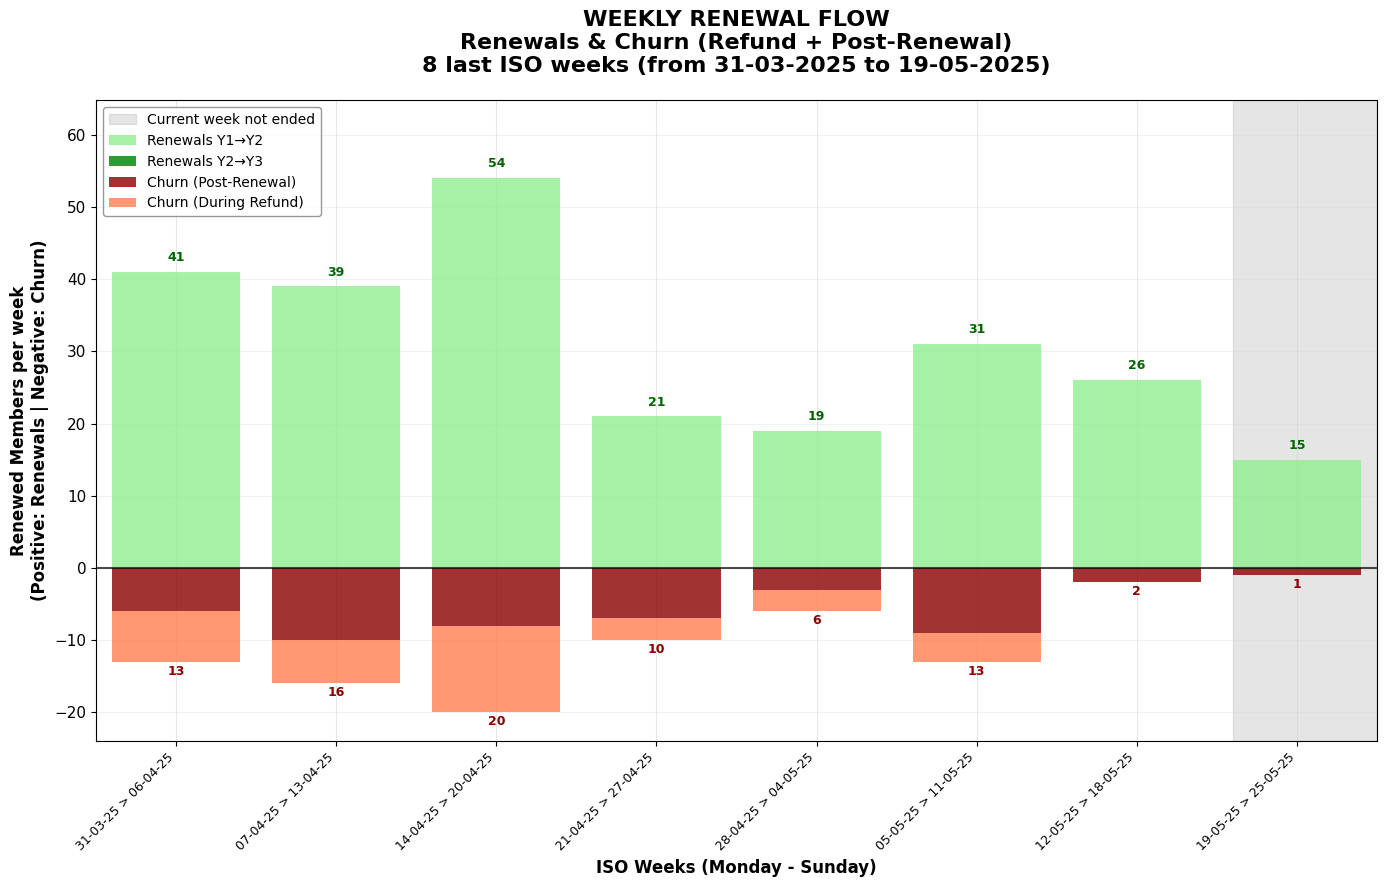

In [204]:
def weekly_renewal_flow_8_weeks(sub_df, today_date, today_iso, num_weeks=8):
    """
    Create a chart with weekly renewal metrics for last N weeks using standardized ISO calendar
    FOCUS: Renewals only (Y1→Y2, Y2→Y3) and churn during refund + churn AFTER renewals
    North: Y1→Y2 Renewals + Y2→Y3 Renewals (stacked)
    South: Churn of renewed members only

    REFACTORED to use standardized ISO week functions
    """

    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    # Obtain renewal data
    renewal_dict = cus_renewal(sub_df)

    renewed_to_y2_df = renewal_dict['renewed_to_y2_df']  # Customers who renewed to Y2
    renewed_to_y3_df = renewal_dict['renewed_to_y3_df']  # Customers who renewed to Y3
    customers_in_y2 = renewal_dict['customer_in_y2_df']
    customers_in_y3 = renewal_dict['customer_in_y3_df']

    print(f"📊 Creating RENEWAL-FOCUSED analysis for last {num_weeks} ISO weeks using standardized functions...")

    # === HELPER FUNCTION TO ADD ISO COLUMNS (Centralized and standardized) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filter valid dates to avoid <NA>
        valid_dates = df[date_column].notna()

        # Initialize columns with default values
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculate only for valid dates
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df

    # Generate the last N ISO weeks correctly with standardized functions
    iso_week_keys = []
    current_year, current_week = today_iso.year, today_iso.week

    for i in range(num_weeks):
        # Add the current week
        iso_week_key = f"{current_year}-W{current_week:02d}"
        iso_week_keys.insert(0, iso_week_key)  # Insert at the beginning for chronological order

        # Move back one ISO week correctly with get_weeks_in_iso_year
        current_week -= 1
        if current_week <= 0:
            current_year -= 1
            current_week = get_weeks_in_iso_year(current_year)

    print(f"📅 Analyzing ISO weeks: {iso_week_keys[0]} to {iso_week_keys[-1]}")

    # === PREPARE DATAFRAMES WITH ISO WEEKS ===
    print("🗓️  Adding ISO week columns...")

    # RENEWALS: Moment they become renewed members (end of refund period)
    y1_to_y2_renewals = add_iso_week_columns(renewed_to_y2_df.copy(), 'refund_period_end_utc')
    y2_to_y3_renewals = add_iso_week_columns(renewed_to_y3_df.copy(), 'refund_period_end_utc')

    # CHURN: Only renewed members who later churned
    # For Y2 renewals that churned
    churn_after_y2_renewal = renewed_to_y2_df[renewed_to_y2_df['canceled_at_utc'].notna()].copy()
    churn_after_y2_renewal = add_iso_week_columns(churn_after_y2_renewal, 'canceled_at_utc')

    # For Y3 renewals that churned
    churn_after_y3_renewal = renewed_to_y3_df[renewed_to_y3_df['canceled_at_utc'].notna()].copy()
    churn_after_y3_renewal = add_iso_week_columns(churn_after_y3_renewal, 'canceled_at_utc')

    # For Y2 churn during refund period
    churn_during_y2_renewal = customers_in_y2[
        (customers_in_y2['canceled_at_utc'].notna()) &
        (customers_in_y2['canceled_during_refund_period'])
    ].copy()
    churn_during_y2_renewal = add_iso_week_columns(churn_during_y2_renewal, 'canceled_at_utc')

    # For Y3 churn during refund period
    churn_during_y3_renewal = customers_in_y3[
        (customers_in_y3['canceled_at_utc'].notna()) &
        (customers_in_y3['canceled_during_refund_period'])
    ].copy()
    churn_during_y3_renewal = add_iso_week_columns(churn_during_y3_renewal, 'canceled_at_utc')

    # === CALCULATE WEEKLY ISO METRICS ===
    print("📈 Calculating renewal metrics...")

    # RENEWALS (gains)
    weekly_renewals_y1_to_y2 = y1_to_y2_renewals[y1_to_y2_renewals['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_renewals_y2_to_y3 = y2_to_y3_renewals[y2_to_y3_renewals['iso_week_key'].notna()].groupby('iso_week_key').size()

    # CHURN post-renewal (losses)
    weekly_churn_post_y2 = churn_after_y2_renewal[churn_after_y2_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_churn_post_y3 = churn_after_y3_renewal[churn_after_y3_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()

    # CHURN during refund period (losses)
    weekly_churn_refund_y2 = churn_during_y2_renewal[churn_during_y2_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_churn_refund_y3 = churn_during_y3_renewal[churn_during_y3_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()

    # === REINDEX ALL SERIES TO FULL RANGE ===
    weekly_renewals_y1_to_y2 = weekly_renewals_y1_to_y2.reindex(iso_week_keys, fill_value=0)
    weekly_renewals_y2_to_y3 = weekly_renewals_y2_to_y3.reindex(iso_week_keys, fill_value=0)
    weekly_churn_post_y2 = weekly_churn_post_y2.reindex(iso_week_keys, fill_value=0)
    weekly_churn_post_y3 = weekly_churn_post_y3.reindex(iso_week_keys, fill_value=0)
    weekly_churn_refund_y2 = weekly_churn_refund_y2.reindex(iso_week_keys, fill_value=0)
    weekly_churn_refund_y3 = weekly_churn_refund_y3.reindex(iso_week_keys, fill_value=0)

    # Combine total churn
    weekly_total_churn_post_renewal = weekly_churn_post_y2 + weekly_churn_post_y3
    weekly_total_churn_refund_renewal = weekly_churn_refund_y2 + weekly_churn_refund_y3

    # === CREATE WEEK LABELS WITH TRUE DATES (USING get_iso_week_bounds) ===
    week_labels = []
    week_dates = []

    for week_key in iso_week_keys:
        try:
            year, week = week_key.split('-W')
            year, week = int(year), int(week)

            # USE STANDARDIZED get_iso_week_bounds FUNCTION
            monday, sunday = get_iso_week_bounds(year, week)

            week_labels.append(f"{monday.strftime('%d-%m-%y')} > {sunday.strftime('%d-%m-%y')}")
            week_dates.append(monday)

        except Exception as e:
            print(f"⚠️  Error processing week {week_key}: {e}")
            week_labels.append(week_key)
            week_dates.append(today_date)  # Fallback

    x_pos = range(len(iso_week_keys))

    # === CREATE THE CHART - RENEWAL FOCUS SHORT PERIOD ===
    fig, ax = plt.subplots(1, 1, figsize=(14, 9))

    # === POSITIVE BARPLOT (NORTH) - RENEWALS ===
    bars_pos_1 = ax.bar(x_pos, weekly_renewals_y1_to_y2,
                        label='Renewals Y1→Y2', color='lightgreen', alpha=0.8)
    bars_pos_2 = ax.bar(x_pos, weekly_renewals_y2_to_y3,
                        bottom=weekly_renewals_y1_to_y2,
                        label='Renewals Y2→Y3', color='green', alpha=0.8)

    # === NEGATIVE BARPLOT (SOUTH) - STACKED CHURN ===
    bars_neg_1 = ax.bar(x_pos, -weekly_total_churn_post_renewal,
                        label='Churn (Post-Renewal)', color='darkred', alpha=0.8)

    bars_neg_2 = ax.bar(x_pos, -weekly_total_churn_refund_renewal,
                        bottom=-weekly_total_churn_post_renewal,  # Stack below
                        label='Churn (During Refund)', color='coral', alpha=0.8)

    # === AXIS CONFIGURATION ===
    ax.set_ylabel('Renewed Members per week\n(Positive: Renewals | Negative: Churn)',
                  fontsize=12, fontweight='bold')
    ax.set_xlabel('ISO Weeks (Monday - Sunday)', fontsize=12, fontweight='bold')

    # === ADD VALUE LABELS (IMPROVED WITH PROTECTION) ===
    for i, (ren1, ren2, churn1, churn2) in enumerate(zip(
        weekly_renewals_y1_to_y2, weekly_renewals_y2_to_y3,
        weekly_total_churn_post_renewal, weekly_total_churn_refund_renewal)):

        # Gains (top)
        total_renewals = ren1 + ren2
        if total_renewals > 0:
            # Protection against empty series
            max_positive = max(weekly_renewals_y1_to_y2 + weekly_renewals_y2_to_y3) if len(weekly_renewals_y1_to_y2) > 0 else 1
            ax.text(i, total_renewals + max_positive * 0.02, str(int(total_renewals)),
                   ha='center', va='bottom', fontsize=9, color='darkgreen', fontweight='bold')

        # Losses (bottom) - Total stacked
        total_churn = churn1 + churn2
        if total_churn > 0:
            # Improved protection to avoid calculation errors
            max_churn = max(weekly_total_churn_post_renewal + weekly_total_churn_refund_renewal) if len(weekly_total_churn_post_renewal) > 0 else 1
            ax.text(i, -(churn1 + churn2) - max_churn * 0.02, str(int(total_churn)),
                   ha='center', va='top', fontsize=9, color='darkred', fontweight='bold')

    # === VISUAL CONFIGURATION ===
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.7)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_xlim(-0.5, len(x_pos) - 0.5)

    # Adjust Y limits with protection
    max_positive = max(weekly_renewals_y1_to_y2 + weekly_renewals_y2_to_y3) if len(weekly_renewals_y1_to_y2) > 0 else 1
    max_negative = max(weekly_total_churn_post_renewal + weekly_total_churn_refund_renewal) if len(weekly_total_churn_post_renewal) > 0 else 0

    y_max = max_positive * 1.2
    y_min = -max_negative * 1.2 if max_negative > 0 else -1
    ax.set_ylim(y_min, y_max)

    # X-axis configuration - show all labels for short periods
    ax.set_xticks(x_pos)
    ax.set_xticklabels(week_labels, rotation=45, ha='right', fontsize=9)

    # === GRAY ZONE FOR IMMATURE PERIODS (USING calculate_target_iso_week) ===
    # Calculate immature cutoff week (2 weeks prior for renewals)
    immature_year, immature_week, immature_cutoff_key = calculate_target_iso_week(today_iso, weeks_back=0)

    print(f"🔍 Immature cutoff at: {immature_cutoff_key}")

    immature_weeks = []
    for i, week_key in enumerate(iso_week_keys):
        # Compare ISO weeks directly
        if week_key >= immature_cutoff_key:
            immature_weeks.append(i)

    if immature_weeks:
        start_idx = min(immature_weeks) - 0.4
        end_idx = max(immature_weeks) + 0.5
        ax.axvspan(start_idx, end_idx, alpha=0.2, color='gray',
                   label='Current week not ended', zorder=0)
        print(f"🔍 Immature period: {len(immature_weeks)} recent weeks")

    # === TITLES AND LEGENDS ===
    start_date = week_dates[0].strftime("%d-%m-%Y") if week_dates else "N/A"
    end_date = week_dates[-1].strftime("%d-%m-%Y") if week_dates else "N/A"
    period_text = f'{num_weeks} last ISO weeks (from {start_date} to {end_date})'

    ax.set_title(f'WEEKLY RENEWAL FLOW\nRenewals & Churn (Refund + Post-Renewal)\n{period_text}',
                 fontsize=16, fontweight='bold', pad=20)

    # Legends
    ax.legend(loc='best', fontsize=10)

    # === SUMMARY METRICS ===
    print("\n=== CALCULATING RENEWAL METRICS ===")

    total_y1_to_y2 = weekly_renewals_y1_to_y2.sum()
    total_y2_to_y3 = weekly_renewals_y2_to_y3.sum()
    total_churn_post_renewal = weekly_total_churn_post_renewal.sum()
    total_churn_refund_renewal = weekly_total_churn_refund_renewal.sum()

    # Derived metrics calculations
    total_renewals = total_y1_to_y2 + total_y2_to_y3
    total_churn = total_churn_post_renewal + total_churn_refund_renewal
    net_renewals = total_renewals - total_churn

    # Weekly averages
    avg_renewals_per_week = total_renewals / num_weeks if num_weeks > 0 else 0
    avg_churn_per_week = total_churn / num_weeks if num_weeks > 0 else 0
    avg_refund_per_week = total_churn_refund_renewal / num_weeks if num_weeks > 0 else 0
    avg_post_churn_per_week = total_churn_post_renewal / num_weeks if num_weeks > 0 else 0

    print(f"📈 Total Y1→Y2 renewals ({num_weeks} weeks): {total_y1_to_y2:,}")
    print(f"📈 Total Y2→Y3 renewals ({num_weeks} weeks): {total_y2_to_y3:,}")
    print(f"📈 Total renewals ({num_weeks} weeks): {total_renewals:,}")
    print(f"📉 Total post-renewal churn ({num_weeks} weeks): {total_churn_post_renewal:,}")
    print(f"📉 Total refund churn ({num_weeks} weeks): {total_churn_refund_renewal:,}")
    print(f"📉 Total churn ({num_weeks} weeks): {total_churn:,}")
    print(f"🎯 Net renewal growth ({num_weeks} weeks): {net_renewals:,}")
    print(f"📊 Avg renewals per week: {avg_renewals_per_week:.1f}")
    print(f"📊 Avg churn per week: {avg_churn_per_week:.1f}")

    # Churn rate
    churn_rate = 0
    if total_renewals > 0:
        churn_rate = (total_churn / total_renewals * 100)
        print(f"📊 Renewal churn rate: {churn_rate:.1f}%")

    plt.tight_layout()

    # === SAVE ===
    filename = f"weekly_renewal_flow_{num_weeks}_weeks_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')
    print(f"📁 Renewal flow chart saved: {filename}")
    plt.show()

    # === ENRICHED RETURN ===
    return {
        'renewals_y1_to_y2': total_y1_to_y2,
        'renewals_y2_to_y3': total_y2_to_y3,
        'total_renewals': total_renewals,
        'churn_post_renewal': total_churn_post_renewal,
        'churn_refund_renewal': total_churn_refund_renewal,
        'total_churn': total_churn,
        'net_renewals': net_renewals,
        'churn_rate': churn_rate,
        'num_weeks': num_weeks,
        'avg_renewals_per_week': avg_renewals_per_week,
        'avg_churn_per_week': avg_churn_per_week,
        'weekly_renewals_y1_to_y2': weekly_renewals_y1_to_y2,
        'weekly_renewals_y2_to_y3': weekly_renewals_y2_to_y3,
        'weekly_churn_post_renewal': weekly_total_churn_post_renewal,
        'weekly_churn_refund_renewal': weekly_total_churn_refund_renewal,
        'iso_week_keys': iso_week_keys,
        'week_labels': week_labels,
        'week_dates': week_dates,
        'avg_refund_per_week': avg_refund_per_week,
        'avg_post_churn_per_week': avg_post_churn_per_week
    }

# === USAGE ===
renewal_metrics_8w = weekly_renewal_flow_8_weeks(sub_df, today_date, today_iso, num_weeks=8)

📊 Creating RENEWAL-FOCUSED weekly flow analysis using standardized ISO calendar...
🗓️  Adding ISO week columns...
📈 Calculating renewal metrics...
📅 Renewal analysis from 2024-W40 to 2025-W21 (34 ISO weeks)
🔍 Immature cutoff at: 2025-W21
🔍 Immature period: 1 recent weeks

=== RENEWAL METRICS SUMMARY ===
📈 Total Y1→Y2 renewals: 1,934
📈 Total Y2→Y3 renewals: 0
📈 Total renewals: 1,934
📉 Total post-renewal churn: 246
📉 Total refund churn: 263
📉 Total churn: 509
🎯 Net renewal growth: 1,425
📊 Renewal churn rate: 26.3%
📁 Renewal flow chart saved: weekly_renewal_flow_all_time_2025-05-23.png


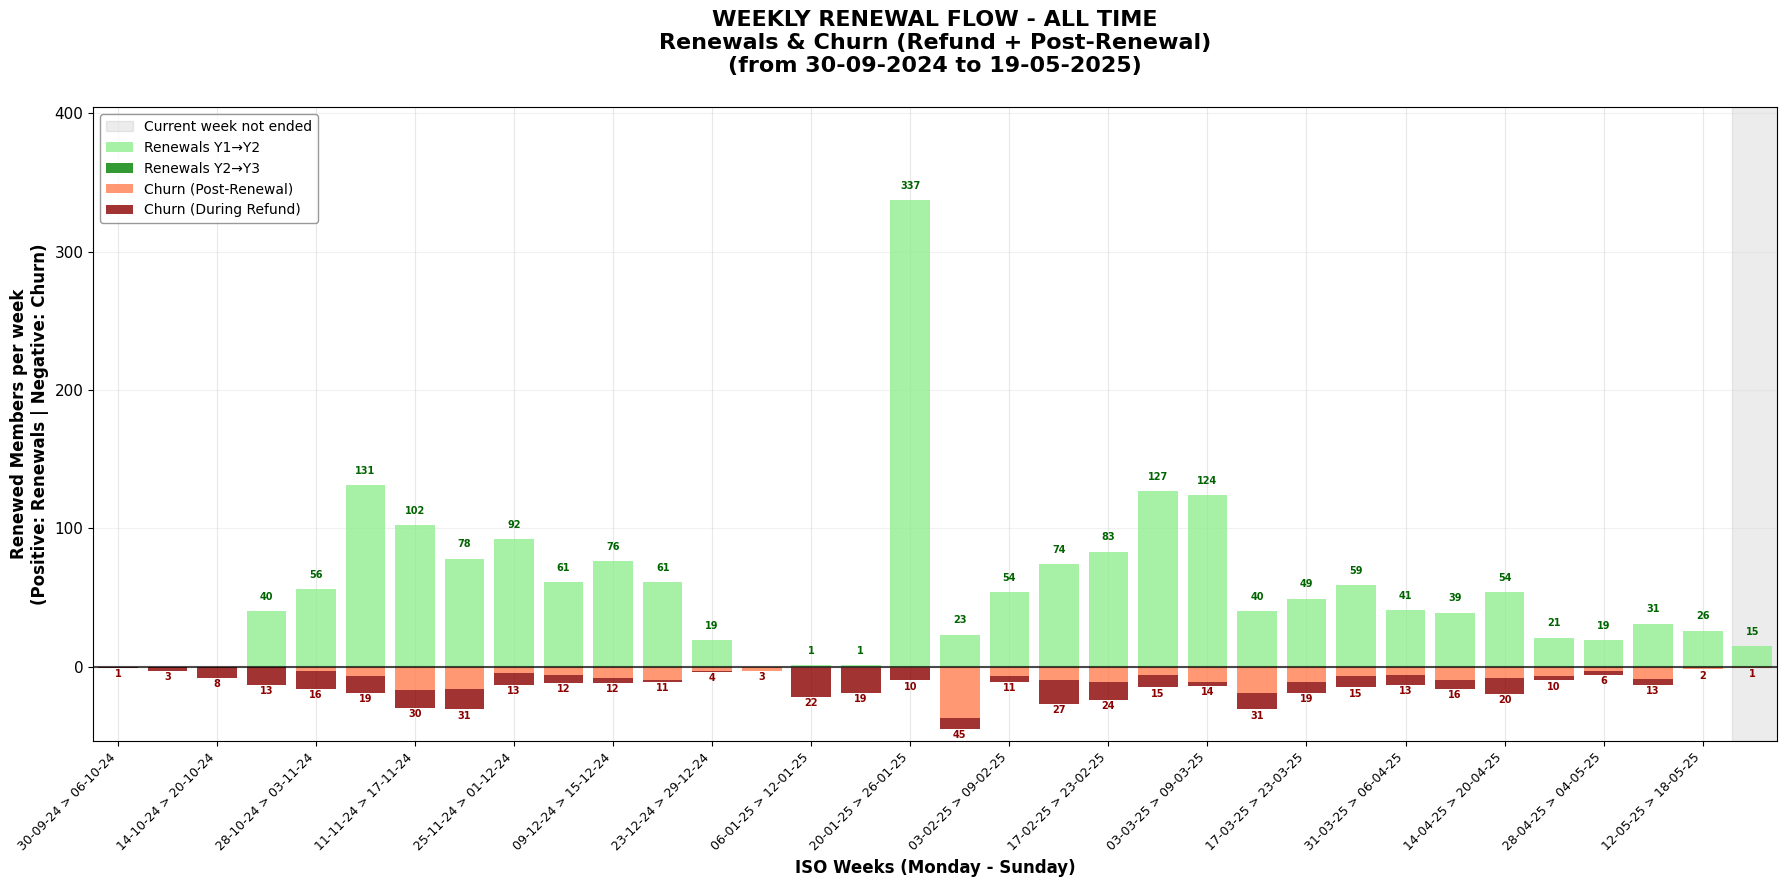

In [205]:
def weekly_renewal_flow_all_time(sub_df, today_date, today_iso):
    """
    Create a chart with weekly renewal metrics for ALL TIME using standardized ISO calendar
    FOCUS: Renewals only (Y1→Y2, Y2→Y3) and churn during refund + churn AFTER renewals
    North: Y1→Y2 Renewals + Y2→Y3 Renewals (stacked)
    South: Churn of renewed members only

    REFACTORED to use standardized ISO week functions and fix bugs
    """
    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    # Obtain renewal data
    renewal_dict = cus_renewal(sub_df)

    renewed_to_y2_df = renewal_dict['renewed_to_y2_df']  # Customers who renewed to Y2
    renewed_to_y3_df = renewal_dict['renewed_to_y3_df']  # Customers who renewed to Y3
    customers_in_y2 = renewal_dict['customer_in_y2_df']
    customers_in_y3 = renewal_dict['customer_in_y3_df']

    print("📊 Creating RENEWAL-FOCUSED weekly flow analysis using standardized ISO calendar...")

    # === HELPER FUNCTION TO ADD ISO COLUMNS (Centralized and standardized) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filter valid dates to avoid <NA>
        valid_dates = df[date_column].notna()

        # Initialize columns with default values
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculate only for valid dates
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df

    # === PREPARE DATAFRAMES WITH ISO WEEKS ===
    print("🗓️  Adding ISO week columns...")

    # RENEWALS: Moment they become renewed members (end of refund period)
    y1_to_y2_renewals = add_iso_week_columns(renewed_to_y2_df.copy(), 'refund_period_end_utc')
    y2_to_y3_renewals = add_iso_week_columns(renewed_to_y3_df.copy(), 'refund_period_end_utc')

    # CHURN: Only renewed members who later churned
    # For Y2 renewals that churned
    churn_after_y2_renewal = renewed_to_y2_df[renewed_to_y2_df['canceled_at_utc'].notna()].copy()
    churn_after_y2_renewal = add_iso_week_columns(churn_after_y2_renewal, 'canceled_at_utc')

    # For Y3 renewals that churned
    churn_after_y3_renewal = renewed_to_y3_df[renewed_to_y3_df['canceled_at_utc'].notna()].copy()
    churn_after_y3_renewal = add_iso_week_columns(churn_after_y3_renewal, 'canceled_at_utc')

    # For Y2 churn during refund period
    churn_during_y2_renewal = customers_in_y2[
        (customers_in_y2['canceled_at_utc'].notna()) &
        (customers_in_y2['canceled_during_refund_period'])
    ].copy()
    churn_during_y2_renewal = add_iso_week_columns(churn_during_y2_renewal, 'canceled_at_utc')

    # For Y3 churn during refund period
    churn_during_y3_renewal = customers_in_y3[
        (customers_in_y3['canceled_at_utc'].notna()) &
        (customers_in_y3['canceled_during_refund_period'])
    ].copy()
    churn_during_y3_renewal = add_iso_week_columns(churn_during_y3_renewal, 'canceled_at_utc')

    # === CALCULATE WEEKLY ISO METRICS ===
    print("📈 Calculating renewal metrics...")

    # RENEWALS (gains)
    weekly_renewals_y1_to_y2 = y1_to_y2_renewals[y1_to_y2_renewals['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_renewals_y2_to_y3 = y2_to_y3_renewals[y2_to_y3_renewals['iso_week_key'].notna()].groupby('iso_week_key').size()

    # CHURN post-renewal (losses)
    weekly_churn_post_y2 = churn_after_y2_renewal[churn_after_y2_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_churn_post_y3 = churn_after_y3_renewal[churn_after_y3_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()

    # CHURN during refund period (losses)
    weekly_churn_refund_y2 = churn_during_y2_renewal[churn_during_y2_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()
    weekly_churn_refund_y3 = churn_during_y3_renewal[churn_during_y3_renewal['iso_week_key'].notna()].groupby('iso_week_key').size()

    # === DETERMINE FULL RANGE OF ISO WEEKS (FIXED) ===
    all_iso_weeks = set()

    # Collect all weeks from all series
    for series in [weekly_renewals_y1_to_y2, weekly_renewals_y2_to_y3,
                   weekly_churn_post_y2, weekly_churn_post_y3,
                   weekly_churn_refund_y2, weekly_churn_refund_y3]:
        if len(series) > 0:
            # Filter valid values
            valid_weeks = [week for week in series.index.tolist()
                          if pd.notna(week) and week != '<NA>' and isinstance(week, str)]
            all_iso_weeks.update(valid_weeks)

    if not all_iso_weeks:
        print("❌ No valid renewal data found")
        return {}

    # === USE STANDARDIZED ISO SORT FUNCTION ===
    def sort_iso_weeks(week_keys):
        """Sort ISO week keys using standardized parsing"""
        def parse_week(week_key):
            try:
                if pd.isna(week_key) or week_key == '<NA>' or not isinstance(week_key, str):
                    return (0, 0)
                year, week = week_key.split('-W')
                return (int(year), int(week))
            except (ValueError, AttributeError):
                print(f"⚠️  Invalid week key ignored: {week_key}")
                return (0, 0)

        valid_weeks = [week for week in week_keys
                      if pd.notna(week) and week != '<NA>' and isinstance(week, str) and '-W' in str(week)]
        return sorted(valid_weeks, key=parse_week)

    sorted_iso_weeks = sort_iso_weeks(list(all_iso_weeks))

    if not sorted_iso_weeks:
        print("❌ No valid ISO weeks after filtering")
        return {}

    first_week_key = sorted_iso_weeks[0]
    last_week_key = sorted_iso_weeks[-1]

    print(f"📅 Renewal analysis from {first_week_key} to {last_week_key} ({len(sorted_iso_weeks)} ISO weeks)")

    # === REINDEX ALL SERIES TO FULL RANGE ===
    weekly_renewals_y1_to_y2 = weekly_renewals_y1_to_y2.reindex(sorted_iso_weeks, fill_value=0)
    weekly_renewals_y2_to_y3 = weekly_renewals_y2_to_y3.reindex(sorted_iso_weeks, fill_value=0)
    weekly_churn_post_y2 = weekly_churn_post_y2.reindex(sorted_iso_weeks, fill_value=0)
    weekly_churn_post_y3 = weekly_churn_post_y3.reindex(sorted_iso_weeks, fill_value=0)
    weekly_churn_refund_y2 = weekly_churn_refund_y2.reindex(sorted_iso_weeks, fill_value=0)
    weekly_churn_refund_y3 = weekly_churn_refund_y3.reindex(sorted_iso_weeks, fill_value=0)

    # Combine total churn
    weekly_total_churn_post_renewal = weekly_churn_post_y2 + weekly_churn_post_y3
    weekly_total_churn_refund_renewal = weekly_churn_refund_y2 + weekly_churn_refund_y3

    # === CREATE WEEK LABELS WITH TRUE DATES (USING get_iso_week_bounds) ===
    week_labels = []
    week_dates = []

    for week_key in sorted_iso_weeks:
        try:
            year, week = week_key.split('-W')
            year, week = int(year), int(week)

            # USE STANDARDIZED get_iso_week_bounds FUNCTION
            monday, sunday = get_iso_week_bounds(year, week)

            week_labels.append(f"{monday.strftime('%d-%m-%y')} > {sunday.strftime('%d-%m-%y')}")
            week_dates.append(monday)

        except Exception as e:
            print(f"⚠️  Error processing week {week_key}: {e}")
            week_labels.append(week_key)
            week_dates.append(today_date)  # Fallback

    x_pos = range(len(sorted_iso_weeks))

    # === CREATE THE CHART - RENEWAL FOCUS ===
    fig, ax = plt.subplots(1, 1, figsize=(18, 9))

    # === POSITIVE BARPLOT (NORTH) - RENEWALS ===
    ax.bar(x_pos, weekly_renewals_y1_to_y2, label='Renewals Y1→Y2', color='lightgreen', alpha=0.8)
    ax.bar(x_pos, weekly_renewals_y2_to_y3, bottom=weekly_renewals_y1_to_y2,
           label='Renewals Y2→Y3', color='green', alpha=0.8)

    # === NEGATIVE BARPLOT (SOUTH) - STACKED CHURN ===
    ax.bar(x_pos, -weekly_total_churn_post_renewal,
           label='Churn (Post-Renewal)', color='coral', alpha=0.8)

    ax.bar(x_pos, -weekly_total_churn_refund_renewal,
           bottom=-weekly_total_churn_post_renewal,
           label='Churn (During Refund)', color='darkred', alpha=0.8)

    # === AXIS CONFIGURATION ===
    ax.set_ylabel('Renewed Members per week\n(Positive: Renewals | Negative: Churn)', fontsize=12, fontweight='bold')
    ax.set_xlabel('ISO Weeks (Monday - Sunday)', fontsize=12, fontweight='bold')

    # === ADD VALUE LABELS (FIXED) ===
    for i, (ren1, ren2, churn1, churn2) in enumerate(zip(
        weekly_renewals_y1_to_y2, weekly_renewals_y2_to_y3,
        weekly_total_churn_post_renewal, weekly_total_churn_refund_renewal)):

        total_renewals = ren1 + ren2
        if total_renewals > 0:
            # Protection against empty series
            max_positive = max(weekly_renewals_y1_to_y2 + weekly_renewals_y2_to_y3) if len(weekly_renewals_y1_to_y2) > 0 else 1
            ax.text(i, total_renewals + max_positive * 0.02, str(int(total_renewals)),
                   ha='center', va='bottom', fontsize=7, color='darkgreen', fontweight='bold')

        total_churn = churn1 + churn2
        if total_churn > 0:
            # Protection against empty series
            max_negative = max(weekly_total_churn_post_renewal + weekly_total_churn_refund_renewal) if len(weekly_total_churn_post_renewal) > 0 else 1
            ax.text(i, -total_churn - max_negative * 0.02, str(int(total_churn)),
                   ha='center', va='top', fontsize=7, color='darkred', fontweight='bold')

    # === VISUAL CONFIGURATION ===
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.7)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_xlim(-0.5, len(x_pos) - 0.5)

    # Adjust Y limits with protection
    max_positive = max(weekly_renewals_y1_to_y2 + weekly_renewals_y2_to_y3) if len(weekly_renewals_y1_to_y2) > 0 else 1
    max_negative = max(weekly_total_churn_post_renewal + weekly_total_churn_refund_renewal) if len(weekly_total_churn_post_renewal) > 0 else 0

    y_max = max_positive * 1.2
    y_min = -max_negative * 1.2 if max_negative > 0 else -1
    ax.set_ylim(y_min, y_max)

    # X-axis configuration - reduce labels for long periods
    step = max(1, len(x_pos) // 15)
    ax.set_xticks(x_pos[::step])
    ax.set_xticklabels([week_labels[i] for i in x_pos[::step]],
                       rotation=45, ha='right', fontsize=9)

    # Calculate immature cutoff week (2 weeks prior for renewals)
    immature_year, immature_week, immature_cutoff_key = calculate_target_iso_week(today_iso, weeks_back=0)

    print(f"🔍 Immature cutoff at: {immature_cutoff_key}")

    immature_weeks = []
    for i, week_key in enumerate(sorted_iso_weeks):
        # Compare ISO weeks directly
        if week_key >= immature_cutoff_key:
            immature_weeks.append(i)

    if immature_weeks:
        start_idx = min(immature_weeks) - 0.4
        end_idx = max(immature_weeks) + 0.5
        ax.axvspan(start_idx, end_idx, alpha=0.15, color='gray',
                   label='Current week not ended', zorder=0)
        print(f"🔍 Immature period: {len(immature_weeks)} recent weeks")

    # === TITLES AND LEGENDS ===
    start_date = week_dates[0].strftime("%d-%m-%Y") if week_dates else "N/A"
    end_date = week_dates[-1].strftime("%d-%m-%Y") if week_dates else "N/A"
    period_text = f'(from {start_date} to {end_date})'
    ax.set_title(f'WEEKLY RENEWAL FLOW - ALL TIME\nRenewals & Churn (Refund + Post-Renewal)\n{period_text}',
                 fontsize=16, fontweight='bold', pad=25)

    # Legends
    lines1, labels1 = ax.get_legend_handles_labels()
    ax.legend(lines1, labels1, loc='upper left', fontsize=10)

    # === SUMMARY METRICS ===
    print("\n=== RENEWAL METRICS SUMMARY ===")

    total_y1_to_y2 = weekly_renewals_y1_to_y2.sum()
    total_y2_to_y3 = weekly_renewals_y2_to_y3.sum()
    total_churn_post_renewal = weekly_total_churn_post_renewal.sum()
    total_churn_refund_renewal = weekly_total_churn_refund_renewal.sum()

    # Derived metrics calculations
    total_renewals = total_y1_to_y2 + total_y2_to_y3
    total_churn = total_churn_post_renewal + total_churn_refund_renewal
    net_renewal_growth = total_renewals - total_churn

    # Weekly averages
    avg_renewals_per_week = total_renewals / len(sorted_iso_weeks) if len(sorted_iso_weeks) > 0 else 0
    avg_churn_per_week = total_churn / len(sorted_iso_weeks) if len(sorted_iso_weeks) > 0 else 0
    avg_refund_per_week = total_churn_refund_renewal / len(sorted_iso_weeks) if len(sorted_iso_weeks) > 0 else 0
    avg_post_churn_per_week = total_churn_post_renewal / len(sorted_iso_weeks) if len(sorted_iso_weeks) > 0 else 0

    print(f"📈 Total Y1→Y2 renewals: {total_y1_to_y2:,}")
    print(f"📈 Total Y2→Y3 renewals: {total_y2_to_y3:,}")
    print(f"📈 Total renewals: {total_renewals:,}")
    print(f"📉 Total post-renewal churn: {total_churn_post_renewal:,}")
    print(f"📉 Total refund churn: {total_churn_refund_renewal:,}")
    print(f"📉 Total churn: {total_churn:,}")
    print(f"🎯 Net renewal growth: {net_renewal_growth:,}")

    # Churn rate
    churn_rate = 0
    if total_renewals > 0:
        churn_rate = (total_churn / total_renewals * 100)
        print(f"📊 Renewal churn rate: {churn_rate:.1f}%")

    plt.tight_layout()

    # === SAVE ===
    filename = f"weekly_renewal_flow_all_time_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')
    print(f"📁 Renewal flow chart saved: {filename}")
    plt.show()

    # === ENRICHED RETURN ===
    return {
        'avg_renewals_per_week': avg_renewals_per_week,
        'avg_churn_per_week': avg_churn_per_week,
        'avg_refund_per_week': avg_refund_per_week,
        'avg_post_churn_per_week': avg_post_churn_per_week,
        'weekly_renewals_y1_to_y2': weekly_renewals_y1_to_y2,
        'weekly_renewals_y2_to_y3': weekly_renewals_y2_to_y3,
        'weekly_churn_post_renewal': weekly_total_churn_post_renewal,
        'weekly_churn_refund_renewal': weekly_total_churn_refund_renewal,
        'total_y1_to_y2': total_y1_to_y2,
        'total_y2_to_y3': total_y2_to_y3,
        'total_renewals': total_renewals,
        'total_churn_post_renewal': total_churn_post_renewal,
        'total_churn_refund_renewal': total_churn_refund_renewal,
        'total_churn': total_churn,
        'net_renewal_growth': net_renewal_growth,
        'churn_rate': churn_rate,
        'iso_weeks': sorted_iso_weeks,
        'week_dates': week_dates,
        'num_weeks': len(sorted_iso_weeks)
    }

# === USAGE ===
renewal_flow_results = weekly_renewal_flow_all_time(sub_df, today_date, today_iso)

📊 Creating cohort conversion funnel using standardized ISO calendar...
🎯 Target cohort week: 2025-W17
📅 Analyzing cohort from 21-04-2025 to 27-04-2025
📅 Analyzing cohort from 18-05-2025 to 27-04-2025
✅ Found 89 trials in cohort week 2025-W17
=== CALCULATING METRICS ===
📊 Cohort week: 2025-W17
📈 Total trials: 89
📊 Trial survival rate: 66.3%
📊 Full conversion rate: 33.7%
📊 Trial→Refund survival rate: 50.8%
📉 Drop-off during trial: 33.7%
📉 Drop-off during refund: 32.6%
📉 Total drop-off: 66.3%
📁 Cohort conversion funnel saved: conversion_funnel_cohort_2025-W17_2025-05-23.png


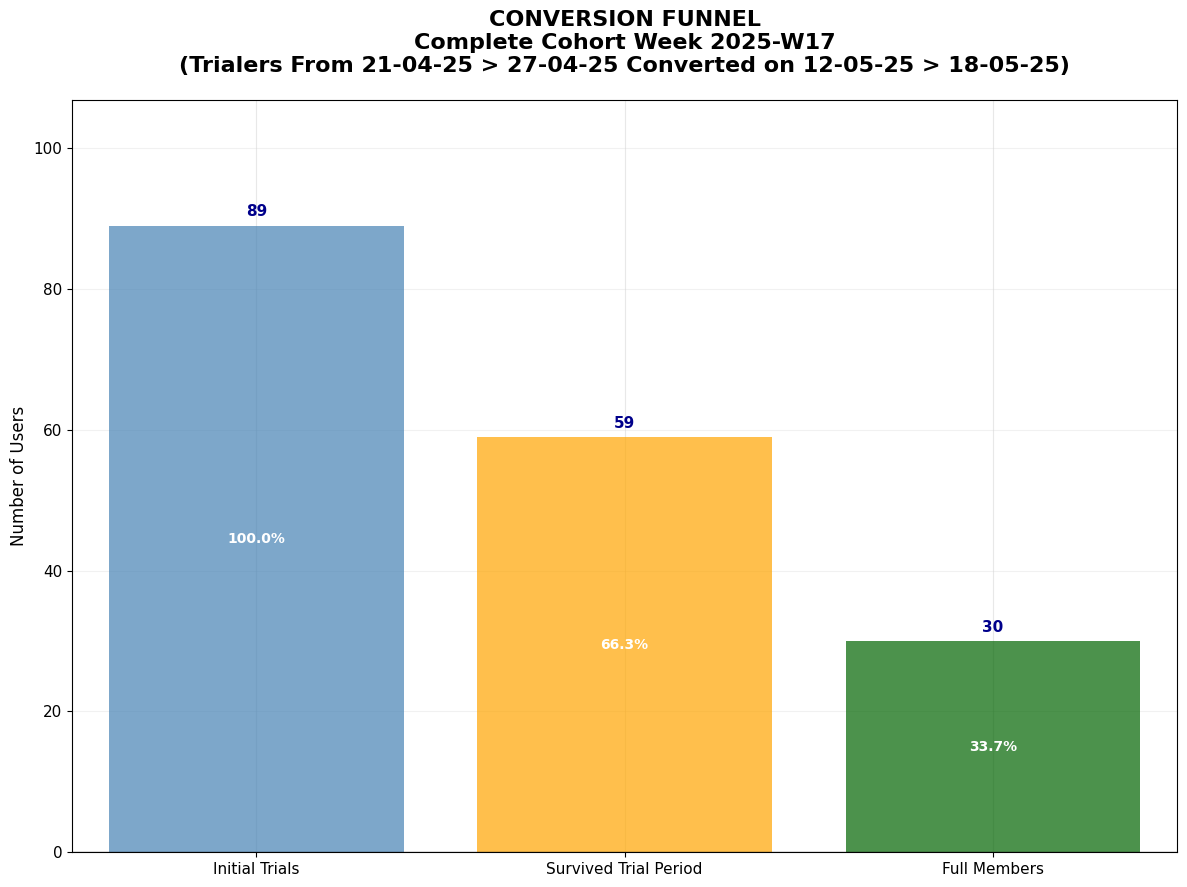

In [206]:
def plot_cohort_conversion_funnel(sub_df, today_date, today_iso):
    """
    Plot a conversion funnel for different cohorts with 3 bars:
    1. Initial trials
    2. Survivors after trial period (not canceled during trial)
    3. Survivors after refund period (not canceled during refund)

    REFACTORED to use standardized ISO week functions instead of Pandas date calculations
    """

    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    print("📊 Creating cohort conversion funnel using standardized ISO calendar...")

    # Check if there is data
    if 'trial_start_utc' not in sub_df.columns or sub_df['trial_start_utc'].isna().all():
        print("❌ No trial data found")
        return {}

    # Calculate the cohort week (4 weeks back for a complete cohort)
    weeks_back = 4
    cohort_year, cohort_week, cohort_week_key = calculate_target_iso_week(today_iso, weeks_back)
    cohort_year_complete, cohort_week_complete, cohort_week_key_complete = calculate_target_iso_week(today_iso, weeks_back=1)

    print(f"🎯 Target cohort week: {cohort_week_key}")

    # === USE get_iso_week_bounds TO OBTAIN TRUE BOUNDS ===
    try:
        cohort_monday, cohort_sunday = get_iso_week_bounds(cohort_year, cohort_week)

        # Convert to UTC for comparison
        cohort_monday_utc = pd.Timestamp(cohort_monday).tz_localize('UTC')
        cohort_sunday_utc = pd.Timestamp(cohort_sunday).tz_localize('UTC') + pd.Timedelta(hours=23, minutes=59, seconds=59)

        print(f"📅 Analyzing cohort from {cohort_monday.strftime('%d-%m-%Y')} to {cohort_sunday.strftime('%d-%m-%Y')}")

    except Exception as e:
        print(f"❌ Error calculating ISO week bounds: {e}")
        return {}

    # === USE get_iso_week_bounds TO OBTAIN TRUE BOUNDS (complete conversion) ===
    try:
        cohort_monday_complete, cohort_sunday_complete = get_iso_week_bounds(cohort_year_complete, cohort_week_complete)

        # Convert to UTC for comparison
        cohort_monday_complete_utc = pd.Timestamp(cohort_monday_complete).tz_localize('UTC')
        cohort_sunday_complete_utc = pd.Timestamp(cohort_sunday_complete).tz_localize('UTC') + pd.Timedelta(hours=23, minutes=59, seconds=59)

        print(f"📅 Analyzing cohort from {cohort_sunday_complete.strftime('%d-%m-%Y')} to {cohort_sunday.strftime('%d-%m-%Y')}")

    except Exception as e:
        print(f"❌ Error calculating ISO week bounds: {e}")
        return {}

    # === HELPER FUNCTION TO ADD ISO COLUMNS (optional for validation) ===
    def add_iso_week_columns(df, date_column):
        """Standardized function to add ISO week columns"""
        df = df.copy()
        df[date_column] = pd.to_datetime(df[date_column])

        # Filter valid dates to avoid <NA>
        valid_dates = df[date_column].notna()

        # Initialize columns with default values
        df['iso_year'] = pd.NA
        df['iso_week'] = pd.NA
        df['iso_week_key'] = pd.NA

        # Calculate only for valid dates
        if valid_dates.any():
            df.loc[valid_dates, 'iso_year'] = df.loc[valid_dates, date_column].dt.isocalendar().year
            df.loc[valid_dates, 'iso_week'] = df.loc[valid_dates, date_column].dt.isocalendar().week
            df.loc[valid_dates, 'iso_week_key'] = (
                df.loc[valid_dates, 'iso_year'].astype(str) + '-W' +
                df.loc[valid_dates, 'iso_week'].astype(str).str.zfill(2)
            )

        return df

    # === FILTER TRIALS FOR THE COHORT WITH EXACT ISO BOUNDS ===
    # Option 1: Direct filtering with calculated bounds
    complete_cohort_trials = sub_df[
        (sub_df['trial_start_utc'] >= cohort_monday_utc) &
        (sub_df['trial_start_utc'] <= cohort_sunday_utc)
    ].copy()

    # Option 2: Validation with ISO week key (optional for debugging)
    if len(complete_cohort_trials) > 0:
        trials_with_iso = add_iso_week_columns(complete_cohort_trials, 'trial_start_utc')
        iso_validation = trials_with_iso[trials_with_iso['iso_week_key'] == cohort_week_key]

        if len(iso_validation) != len(complete_cohort_trials):
            print(f"⚠️  Validation warning: Direct filter ({len(complete_cohort_trials)}) vs ISO filter ({len(iso_validation)})")
            # Use the ISO method for greater accuracy
            complete_cohort_trials = iso_validation

    if len(complete_cohort_trials) == 0:
        print(f"❌ No trial data found for cohort week {cohort_week_key}")
        return {}

    print(f"✅ Found {len(complete_cohort_trials)} trials in cohort week {cohort_week_key}")

    # === CALCULATE THE FUNNEL FOR THE COMPLETE COHORT ===
    total_trials = len(complete_cohort_trials)

    # Survivors after trial period (not canceled during trial)
    survivors_trial = len(complete_cohort_trials[
        ~complete_cohort_trials['canceled_during_trial']
    ])

    # Survivors after refund period (not canceled during refund)
    survivors_refund = len(complete_cohort_trials[
        (~complete_cohort_trials['canceled_during_trial']) &
        (~complete_cohort_trials['canceled_during_refund_period'])
    ])

    # === CREATE CHART (same style as other functions) ===
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))

    categories = ['Initial Trials', 'Survived Trial Period', 'Full Members']
    values = [total_trials, survivors_trial, survivors_refund]
    colors = ['steelblue', 'orange', 'darkgreen']  # Colors harmonized with other charts

    bars = ax.bar(categories, values, color=colors, alpha=0.7)

    # Add numbers on bars (same style as other functions)
    for i, (bar, value) in enumerate(zip(bars, values)):
        height = bar.get_height()
        # Protection against max() on empty list
        max_val = max(values) if values else 1
        ax.text(bar.get_x() + bar.get_width()/2., height + max_val * 0.01,
                f'{value:,}', ha='center', va='bottom',
                fontsize=11, color='darkblue', fontweight='bold')

        # Add percentage from previous step
        if total_trials > 0:
            percentage = (value / total_trials) * 100
            ax.text(bar.get_x() + bar.get_width()/2., height/2,
                    f'{percentage:.1f}%', ha='center', va='center',
                    fontweight='bold', fontsize=10, color='white')

    # === TITLES AND CONFIGURATION (using true ISO dates) ===
    week_label_complete = f"{cohort_monday_complete_utc.strftime('%d-%m-%y')} > {cohort_sunday_complete_utc.strftime('%d-%m-%y')}"
    week_label = f"{cohort_monday.strftime('%d-%m-%y')} > {cohort_sunday.strftime('%d-%m-%y')}"
    ax.set_title(f'CONVERSION FUNNEL\nComplete Cohort Week {cohort_week_key}\n(Trialers From {week_label} Converted on {week_label_complete})',
                 fontsize=16, fontweight='bold', pad=20)

    ax.set_ylabel('Number of Users', fontsize=12)
    ax.grid(axis='y', alpha=0.3)

    # Protection against max() on empty list
    max_val = max(values) if values else 1
    ax.set_ylim(0, max_val * 1.2)

    # === VISUAL CONFIGURATION (same style as other functions) ===
    ax.set_xlim(-0.5, len(categories) - 0.5)

    # === SUMMARY METRICS ===
    print("=== CALCULATING METRICS ===")

    conversion_trial = (survivors_trial / total_trials * 100) if total_trials > 0 else 0
    conversion_refund = (survivors_refund / total_trials * 100) if total_trials > 0 else 0
    drop_off_trial = ((total_trials - survivors_trial) / total_trials * 100) if total_trials > 0 else 0
    drop_off_refund = ((survivors_trial - survivors_refund) / total_trials * 100) if total_trials > 0 else 0

    # Additional metrics
    survival_rate_trial_to_refund = (survivors_refund / survivors_trial * 100) if survivors_trial > 0 else 0

    print(f"📊 Cohort week: {cohort_week_key}")
    print(f"📈 Total trials: {total_trials:,}")
    print(f"📊 Trial survival rate: {conversion_trial:.1f}%")
    print(f"📊 Full conversion rate: {conversion_refund:.1f}%")
    print(f"📊 Trial→Refund survival rate: {survival_rate_trial_to_refund:.1f}%")
    print(f"📉 Drop-off during trial: {drop_off_trial:.1f}%")
    print(f"📉 Drop-off during refund: {drop_off_refund:.1f}%")
    print(f"📉 Total drop-off: {100 - conversion_refund:.1f}%")

    # Add a separator line as in other functions
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

    plt.tight_layout()

    # === SAVE (using ISO key instead of Pandas format) ===
    filename = f"conversion_funnel_cohort_{cohort_week_key}_{today_date.strftime('%Y-%m-%d')}.png"
    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')
    print(f"📁 Cohort conversion funnel saved: {filename}")
    plt.show()

    # === RETURN DATA (enriched with ISO data) ===
    return {
        'total_trials': total_trials,
        'survived_trial': survivors_trial,
        'survived_refund': survivors_refund,
        'conversion_trial_rate': conversion_trial,
        'conversion_refund_rate': conversion_refund,
        'survival_rate_trial_to_refund': survival_rate_trial_to_refund,
        'drop_off_trial': drop_off_trial,
        'drop_off_refund': drop_off_refund,
        'total_drop_off': 100 - conversion_refund,
        'cohort_week_start': cohort_monday,
        'cohort_week_end': cohort_sunday,
        'cohort_week_label': week_label,
        'cohort_week_key': cohort_week_key,
        'cohort_year': cohort_year,
        'cohort_week_number': cohort_week,
        'weeks_back': weeks_back
    }

# Usage
last_cohort_dict = plot_cohort_conversion_funnel(sub_df, today_date, today_iso)

📊 Creating cohort conversion funnel comparison using standardized ISO calendar...
✅ Using ISO cohort data: 2025-W17
=== CALCULATING COMPARISON COHORTS WITH ISO FUNCTIONS ===
📅 Previous cohort: 2025-W16 (14-04-2025 to 20-04-2025)
📅 6-month period: 2024-W45 to 2025-W17
📅 All-time period: 2023-09-25 to 2025-04-27 (82.9 weeks)
=== CALCULATING COMPARISON METRICS ===
📊 Last cohort (2025-W17): 33.7%
📊 Previous cohort (2025-W16): 42.1%
📊 6-month average: 39.1%
📊 All-time average: 37.1%
📁 Conversion funnel comparison saved: conversion_funnel_comparison_2025-W17_2025-05-23.png


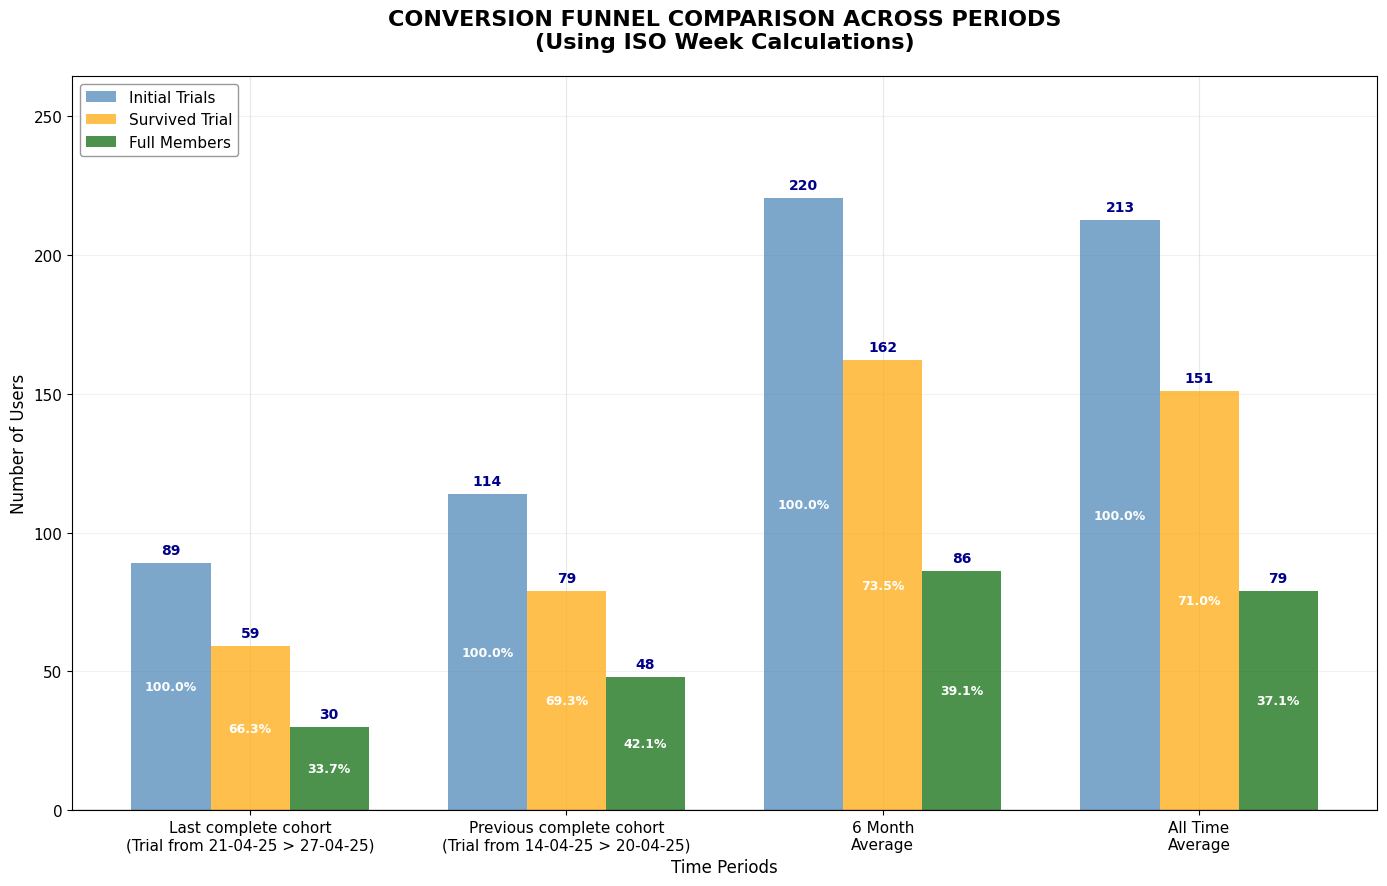

In [207]:
def plot_cohort_conversion_funnel_comparison(sub_df, today_date, today_iso, last_cohort_dict):
    """
    Plot a conversion funnel comparing different cohorts with 3 bars:
    1. Initial trials
    2. Survivors after trial period (not canceled during trial)
    3. Survivors after refund period (not canceled during refund)

    REFACTORED to use standardized ISO week functions instead of Pandas calculations
    """

    sub_df = sub_df[~sub_df['is_gifted_member']].copy()

    print("📊 Creating cohort conversion funnel comparison using standardized ISO calendar...")

    # Check if there is data
    if 'trial_start_utc' not in sub_df.columns or sub_df['trial_start_utc'].isna().all():
        print("❌ No trial data found")
        return {}

    # === RETRIEVE DATA FROM THE LAST COHORT ===
    last_total_trials = last_cohort_dict['total_trials']
    last_survived_trial = last_cohort_dict['survived_trial']
    last_survived_refund = last_cohort_dict['survived_refund']
    last_conversion_trial_rate = last_cohort_dict['conversion_trial_rate']
    last_conversion_refund_rate = last_cohort_dict['conversion_refund_rate']
    last_total_drop_off = last_cohort_dict['total_drop_off']

    # Use ISO cohort data from the harmonized dictionary
    if 'cohort_week_key' in last_cohort_dict:
        # New format with ISO data
        complete_cohort_start = last_cohort_dict['cohort_week_start']
        complete_cohort_end = last_cohort_dict['cohort_week_end']
        complete_cohort_label = last_cohort_dict['cohort_week_label']
        complete_cohort_key = last_cohort_dict['cohort_week_key']
        print(f"✅ Using ISO cohort data: {complete_cohort_key}")
    else:
        # Fallback for legacy format
        complete_cohort_start = last_cohort_dict['cohort_week_start']
        complete_cohort_end = last_cohort_dict['cohort_week_end']
        complete_cohort_label = last_cohort_dict['cohort_week_label']
        complete_cohort_key = "Unknown"
        print("⚠️  Using legacy cohort data format")

    print("=== CALCULATING COMPARISON COHORTS WITH ISO FUNCTIONS ===")

    prev_weeks_back = 5

    try:
        prev_cohort_year, prev_cohort_week, prev_cohort_key = calculate_target_iso_week(today_iso, prev_weeks_back)
        prev_cohort_monday, prev_cohort_sunday = get_iso_week_bounds(prev_cohort_year, prev_cohort_week)

        # UTC conversion for comparison
        prev_cohort_monday_utc = pd.Timestamp(prev_cohort_monday).tz_localize('UTC')
        prev_cohort_sunday_utc = pd.Timestamp(prev_cohort_sunday).tz_localize('UTC') + pd.Timedelta(hours=23, minutes=59, seconds=59)

        print(f"📅 Previous cohort: {prev_cohort_key} ({prev_cohort_monday.strftime('%d-%m-%Y')} to {prev_cohort_sunday.strftime('%d-%m-%Y')})")

        prev_cohort_trials = sub_df[
            (sub_df['trial_start_utc'] >= prev_cohort_monday_utc) &
            (sub_df['trial_start_utc'] <= prev_cohort_sunday_utc)
        ]

        prev_total_trials = len(prev_cohort_trials)
        prev_survivors_trial = len(prev_cohort_trials[~prev_cohort_trials['canceled_during_trial']])
        prev_survivors_refund = len(prev_cohort_trials[
            (~prev_cohort_trials['canceled_during_trial']) &
            (~prev_cohort_trials['canceled_during_refund_period'])
        ])

    except Exception as e:
        print(f"❌ Error calculating previous cohort: {e}")
        prev_total_trials = prev_survivors_trial = prev_survivors_refund = 0
        prev_cohort_monday = prev_cohort_sunday = today_date
        prev_cohort_key = "Error"

    # === 6-MONTH AVERAGE - USING calculate_target_iso_week ===
    try:
        # 6-month period (24 weeks) ending 4 weeks ago
        six_m_end_year, six_m_end_week, six_m_end_key = calculate_target_iso_week(today_iso, weeks_back=4)
        six_m_start_year, six_m_start_week, six_m_start_key = calculate_target_iso_week(today_iso, weeks_back=28)  # 4 + 24

        six_m_start_monday, _ = get_iso_week_bounds(six_m_start_year, six_m_start_week)
        _, six_m_end_sunday = get_iso_week_bounds(six_m_end_year, six_m_end_week)

        # UTC conversion
        six_m_start_utc = pd.Timestamp(six_m_start_monday).tz_localize('UTC')
        six_m_end_utc = pd.Timestamp(six_m_end_sunday).tz_localize('UTC') + pd.Timedelta(hours=23, minutes=59, seconds=59)

        print(f"📅 6-month period: {six_m_start_key} to {six_m_end_key}")

        six_m_cohort_trials = sub_df[
            (sub_df['trial_start_utc'] >= six_m_start_utc) &
            (sub_df['trial_start_utc'] <= six_m_end_utc)
        ]

        six_m_time_divider = 24  # 24 weeks
        six_m_total_trials = len(six_m_cohort_trials) / six_m_time_divider
        six_m_survivors_trial = len(six_m_cohort_trials[~six_m_cohort_trials['canceled_during_trial']]) / six_m_time_divider
        six_m_survivors_refund = len(six_m_cohort_trials[
            (~six_m_cohort_trials['canceled_during_trial']) &
            (~six_m_cohort_trials['canceled_during_refund_period'])
        ]) / six_m_time_divider

    except Exception as e:
        print(f"❌ Error calculating 6-month average: {e}")
        six_m_total_trials = six_m_survivors_trial = six_m_survivors_refund = 0

    # === ALL-TIME AVERAGE - USING ISO BOUNDS ===
    try:
        all_time_cohort_start = sub_df['trial_start_utc'].min()

        # Use the same end bound as 6-month period
        six_m_end_year, six_m_end_week, _ = calculate_target_iso_week(today_iso, weeks_back=4)
        _, all_time_cohort_end = get_iso_week_bounds(six_m_end_year, six_m_end_week)
        all_time_cohort_end_utc = pd.Timestamp(all_time_cohort_end).tz_localize('UTC') + pd.Timedelta(hours=23, minutes=59, seconds=59)

        if pd.notna(all_time_cohort_start):
            # Calculate the divider in ISO weeks
            all_time_divider = (all_time_cohort_end_utc - all_time_cohort_start).days / 7

            all_time_cohort_trials = sub_df[
                (sub_df['trial_start_utc'] >= all_time_cohort_start) &
                (sub_df['trial_start_utc'] <= all_time_cohort_end_utc)
            ]

            all_time_total_trials = len(all_time_cohort_trials) / all_time_divider
            all_time_survivors_trial = len(all_time_cohort_trials[~all_time_cohort_trials['canceled_during_trial']]) / all_time_divider
            all_time_survivors_refund = len(all_time_cohort_trials[
                (~all_time_cohort_trials['canceled_during_trial']) &
                (~all_time_cohort_trials['canceled_during_refund_period'])
            ]) / all_time_divider

            print(f"📅 All-time period: {all_time_cohort_start.strftime('%Y-%m-%d')} to {all_time_cohort_end.strftime('%Y-%m-%d')} ({all_time_divider:.1f} weeks)")
        else:
            all_time_total_trials = all_time_survivors_trial = all_time_survivors_refund = 0

    except Exception as e:
        print(f"❌ Error calculating all-time average: {e}")
        all_time_total_trials = all_time_survivors_trial = all_time_survivors_refund = 0

    # === CREATE THE CHART (same style as other functions) ===
    fig, ax = plt.subplots(1, 1, figsize=(14, 9))

    # Prepare data with ISO labels
    prev_cohort_label = f"{prev_cohort_monday.strftime('%d-%m-%y')} > {prev_cohort_sunday.strftime('%d-%m-%y')}"

    periods = [
        f'Last complete cohort\n(Trial from {complete_cohort_label})',
        f'Previous complete cohort\n(Trial from {prev_cohort_label})',
        '6 Month\nAverage',
        'All Time\nAverage'
    ]

    initial_trials = [last_total_trials, prev_total_trials, six_m_total_trials, all_time_total_trials]
    survived_trial = [last_survived_trial, prev_survivors_trial, six_m_survivors_trial, all_time_survivors_trial]
    full_members = [last_survived_refund, prev_survivors_refund, six_m_survivors_refund, all_time_survivors_refund]

    # Positioning of bars
    x = np.arange(len(periods))
    bar_width = 0.25

    # Colors harmonized with other functions
    colors = ['steelblue', 'orange', 'darkgreen']

    # Create bars
    bars1 = ax.bar(x - bar_width, initial_trials, bar_width,
                   label='Initial Trials', color=colors[0], alpha=0.7)
    bars2 = ax.bar(x, survived_trial, bar_width,
                   label='Survived Trial', color=colors[1], alpha=0.7)
    bars3 = ax.bar(x + bar_width, full_members, bar_width,
                   label='Full Members', color=colors[2], alpha=0.7)

    # Add values on bars with protection
    def add_value_labels(bars, values):
        # Protection against max() on empty lists
        max_val = max(max(initial_trials) if initial_trials else [0],
                      max(survived_trial) if survived_trial else [0],
                      max(full_members) if full_members else [0])
        max_val = max_val if max_val > 0 else 1

        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + max_val * 0.01,
                    f'{value:.0f}', ha='center', va='bottom', fontweight='bold',
                    fontsize=10, color='darkblue')

    add_value_labels(bars1, initial_trials)
    add_value_labels(bars2, survived_trial)
    add_value_labels(bars3, full_members)

    # Add percentages inside bars
    def add_percentage_labels(bars, values, base_values):
        for i, (bar, value, base) in enumerate(zip(bars, values, base_values)):
            if base > 0:
                percentage = (value / base) * 100
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height/2,
                        f'{percentage:.1f}%', ha='center', va='center',
                        fontweight='bold', fontsize=9, color='white')

    # Add percentages (all relative to initial trials)
    add_percentage_labels(bars1, initial_trials, initial_trials)  # 100% for initial trials
    add_percentage_labels(bars2, survived_trial, initial_trials)
    add_percentage_labels(bars3, full_members, initial_trials)

    # === CHART CONFIGURATION ===
    ax.set_xlabel('Time Periods', fontsize=12)
    ax.set_ylabel('Number of Users', fontsize=12)
    ax.set_title('CONVERSION FUNNEL COMPARISON ACROSS PERIODS\n(Using ISO Week Calculations)',
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(periods, fontsize=11)
    ax.legend(fontsize=11, loc='upper left')
    ax.grid(axis='y', alpha=0.3)

    # Set Y-axis limits with protection
    all_values = initial_trials + survived_trial + full_members
    max_value = max(all_values) if all_values else 1
    if max_value > 0:
        ax.set_ylim(0, max_value * 1.2)

    # Separator line
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

    # === SUMMARY METRICS ===
    print("=== CALCULATING COMPARISON METRICS ===")

    last_conversion_rate = last_conversion_refund_rate
    prev_conversion_rate = (prev_survivors_refund / prev_total_trials * 100) if prev_total_trials > 0 else 0
    six_m_conversion_rate = (six_m_survivors_refund / six_m_total_trials * 100) if six_m_total_trials > 0 else 0
    all_time_conversion_rate = (all_time_survivors_refund / all_time_total_trials * 100) if all_time_total_trials > 0 else 0

    print(f"📊 Last cohort ({complete_cohort_key}): {last_conversion_rate:.1f}%")
    print(f"📊 Previous cohort ({prev_cohort_key}): {prev_conversion_rate:.1f}%")
    print(f"📊 6-month average: {six_m_conversion_rate:.1f}%")
    print(f"📊 All-time average: {all_time_conversion_rate:.1f}%")

    plt.tight_layout()

    # === SAVE (using ISO key instead of Pandas format) ===
    if 'cohort_week_key' in last_cohort_dict:
        filename = f"conversion_funnel_comparison_{last_cohort_dict['cohort_week_key']}_{today_date.strftime('%Y-%m-%d')}.png"
    else:
        # Fallback for legacy format
        cohort_week_str = complete_cohort_start.strftime('%Y-W%U')
        filename = f"conversion_funnel_comparison_{cohort_week_str}_{today_date.strftime('%Y-%m-%d')}.png"

    plt.savefig(os.path.join(analysis_dir, filename), dpi=300, bbox_inches='tight')
    print(f"📁 Conversion funnel comparison saved: {filename}")
    plt.show()

    # === ENRICHED RETURN DATA ===
    cohort_dict = {
        'last_cohort': {
            'values': [last_total_trials, last_survived_trial, last_survived_refund],
            'conversion_rate': last_conversion_rate,
            'week_label': complete_cohort_label,
            'week_key': complete_cohort_key if 'cohort_week_key' in last_cohort_dict else "Unknown"
        },
        'prev_cohort': {
            'values': [prev_total_trials, prev_survivors_trial, prev_survivors_refund],
            'conversion_rate': prev_conversion_rate,
            'week_label': prev_cohort_label,
            'week_key': prev_cohort_key if 'prev_cohort_key' in locals() else "Unknown"
        },
        'six_month_avg': {
            'values': [six_m_total_trials, six_m_survivors_trial, six_m_survivors_refund],
            'conversion_rate': six_m_conversion_rate,
            'period_start_key': six_m_start_key if 'six_m_start_key' in locals() else "Unknown",
            'period_end_key': six_m_end_key if 'six_m_end_key' in locals() else "Unknown"
        },
        'all_time_avg': {
            'values': [all_time_total_trials, all_time_survivors_trial, all_time_survivors_refund],
            'conversion_rate': all_time_conversion_rate
        }
    }

    return cohort_dict

# Usage
last_cohort_comparison = plot_cohort_conversion_funnel_comparison(sub_df, today_date, today_iso, last_cohort_dict)

In [208]:
from reportlab.lib.pagesizes import A3, landscape
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import cm
from reportlab.lib import colors
from reportlab.lib.enums import TA_CENTER, TA_LEFT
import glob

def create_analysis_report_pdf(today_date, today_iso, analysis_dir='analysis'):
    """
    Create a comprehensive PDF report page by page
    Uses harmonized function naming conventions and file patterns
    """

    print("=== GENERATING PDF REPORT ===")

    # === PDF CONFIGURATION (harmonized with other functions) ===
    # Use the same week calculation method as other functions
    target_year, target_week, target_week_key = calculate_target_iso_week(today_iso, weeks_back=1)
    last_week_monday, last_week_sunday = get_iso_week_bounds(target_year, target_week)
    week_label = f"{last_week_monday.strftime('%d-%m-%y')} > {last_week_sunday.strftime('%d-%m-%y')}"

    target_year2, target_week2, target_week_key2 = calculate_target_iso_week(today_iso, weeks_back=2)
    last_week_monday2, last_week_sunday2 = get_iso_week_bounds(target_year2, target_week2)
    week_label2 = f"{last_week_monday2.strftime('%d-%m-%y')} > {last_week_sunday2.strftime('%d-%m-%y')}"

    pdf_filename = f'ANALYSIS_REPORT_{today_date.strftime("%Y-%m-%d")}.pdf'
    pdf_path = os.path.join(analysis_dir, pdf_filename)

    # Create PDF document in LANDSCAPE A3
    doc = SimpleDocTemplate(
        pdf_path,
        pagesize=landscape(A3),
        rightMargin=1*cm,
        leftMargin=1*cm,
        topMargin=1*cm,
        bottomMargin=1*cm
    )

    # === STYLES ===
    styles = getSampleStyleSheet()

    # Main title style
    title_style = ParagraphStyle(
        'CustomTitle',
        parent=styles['Heading1'],
        fontSize=36,
        spaceAfter=20,
        alignment=TA_CENTER,
        textColor=colors.black
    )

    # Subtitle style
    subtitle_style = ParagraphStyle(
        'CustomSubtitle',
        parent=styles['Heading2'],
        fontSize=24,
        spaceAfter=20,
        alignment=TA_CENTER,
        textColor=colors.black
    )

    small_subtitle_style = ParagraphStyle(
        'CustomSubtitle',
        parent=styles['Normal'],
        fontSize=18,
        spaceAfter=18,
        alignment=TA_CENTER,
        textColor=colors.black
    )

    small_subtitle_style2 = ParagraphStyle(
        'CustomSubtitle',
        parent=styles['Normal'],
        fontSize=16,
        spaceAfter=18,
        alignment=TA_CENTER,
        textColor=colors.black
    )

    # Section style
    section_style = ParagraphStyle(
        'SectionHeading',
        parent=styles['Heading2'],
        fontSize=20,
        spaceAfter=20,
        textColor=colors.darkblue
    )

    # Normal text styles
    normal_style = ParagraphStyle(
        'CustomNormal',
        parent=styles['Normal'],
        fontSize=18,
        spaceAfter=15,
        alignment=TA_LEFT
    )

    big_style = ParagraphStyle(
        'CustomNormal',
        parent=styles['Normal'],
        fontSize=22,
        spaceAfter=15,
        alignment=TA_LEFT
    )

    # Style for important metrics
    metrics_style = ParagraphStyle(
        'MetricsStyle',
        parent=styles['Normal'],
        fontSize=18,
        spaceAfter=12,
        textColor=colors.darkgreen,
        leftIndent=20
    )

    # === HELPER FUNCTION FOR CENTERED IMAGES ===
    def create_centered_image(image_path, width, height, title):
        """Create a centered image with title"""
        elements = []

        # Section title
        elements.append(Paragraph(title, subtitle_style))
        elements.append(Spacer(1, 0.8*cm))

        # Centered image in table
        centered_image = Image(image_path, width=width, height=height)
        image_table = Table([[centered_image]], colWidths=[40*cm])
        image_table.setStyle(TableStyle([
            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
            ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
        ]))

        elements.append(image_table)
        return elements

    # === HELPER FUNCTION TO FIND LATEST FILES (harmonized) ===
    def find_latest_chart(pattern):
        """Find the latest chart file matching the harmonized naming pattern"""
        try:
            files = glob.glob(os.path.join(analysis_dir, pattern))
            if files:
                return max(files, key=os.path.getctime)
            return None
        except Exception as e:
            print(f"❌ Error finding chart {pattern}: {e}")
            return None

    # === PDF CONTENT ===
    story = []

    # ============================================================================
    # === PAGE 1: TITLE PAGE ===
    # ============================================================================
    story.append(Spacer(1, 3*cm))
    story.append(Paragraph("DISHPATCH WEEKLY ANALYSIS REPORT", title_style))
    story.append(Paragraph(f"{today_date.strftime('%B %d, %Y')}", subtitle_style))
    story.append(Paragraph(f"(Last week = {week_label})", small_subtitle_style))
    story.append(Paragraph(f"(Previous week = {week_label2})", small_subtitle_style2))
    story.append(Spacer(1, 1*cm))

    # Executive summary on title page
    story.append(Paragraph("EXECUTIVE SUMMARY", section_style))

    story.append(Paragraph(f"Currently Active full member ever: <b>{renewal_dict['all_active_full_member']}</b>", big_style))
    story.append(Paragraph(f"<i>Active Full Member 1st year: <b>{renewal_dict['active_in_y1']}</b> - 2nd year: <b>{renewal_dict['active_in_y2']}</b> - 3rd year: <b>{renewal_dict['active_in_y3']}</b></i>", normal_style))
    story.append(Spacer(1, 0.5*cm))

    story.append(Paragraph(f"Conversion Rate (from Trial to Full Member): <b>{renewal_dict['conversion_rate']}%</b>", big_style))
    story.append(Paragraph(f"<i>To be a full member a user must complete their trial, not request a refund, and not be gifted. (refund period {REFUND_PERIOD_DAYS} days)</i>", normal_style))
    story.append(Spacer(1, 0.5*cm))

    story.append(Paragraph(f"Renewal Rate: <b>{renewal_dict['renewal_rate_y1_to_y2']}%</b>", big_style))
    story.append(Paragraph(f"<i>Renewal rate from 1st year to 2nd year: <b>{renewal_dict['renewal_rate_y1_to_y2']}%</b> from 2nd year to 3rd year: <b>{renewal_dict['renewal_rate_y2_to_y3']}%.</b></i>", normal_style))
    story.append(Paragraph(f"<i>Ask for refund at the beginning of 2nd year: <b>{renewal_dict['refund_during_y2']} - {renewal_dict['refund_rate_y2']}%</b> from 2nd year to 3rd year: <b>{renewal_dict['refund_during_y3']} - {renewal_dict['refund_rate_y3']}%</b></i>", normal_style))
    story.append(Spacer(1, 0.5*cm))

    story.append(Paragraph(f"New trial last week: <b>{new_trial_last_week['trials_count']}</b><i> (previous week: {new_trial_prev_week['trials_count']})</i>", big_style))
    story.append(Paragraph(f"New full member last week: <b>{last_week_new_full_member['count']}</b><i> (previous week: {prev_week_new_full_member['count']})</i>", big_style))
    story.append(Paragraph(f"Churn full member last week: <b>{last_week_churned_members['count']}</b><i> (previous week: {prev_week_churned_members['count']})</i>", big_style))
    story.append(Spacer(1, 0.5*cm))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 2: Trial 8 weeks (harmonized naming) ===
    # ============================================================================
    latest_trial_8w = find_latest_chart("weekly_trials_8_weeks_*.png")
    if latest_trial_8w:
        story.extend(create_centered_image(latest_trial_8w, 28*cm, 18*cm, "WEEKLY NEW TRIALS 8 LAST WEEKS"))
        story.append(Paragraph(f"Average per week: <b>{trials_metrics_8w['average_per_week']:.0f}</b>", normal_style))
        story.append(Paragraph(f"Recent 4-week average: <b>{trials_metrics_8w['recent_4w_avg']:.0f}</b>", normal_style))
        story.append(Paragraph(f"Latest week: <b>{trials_metrics_8w['latest_week']}</b>", normal_style))
        story.append(Paragraph(f"Previous week: <b>{trials_metrics_8w['previous_week']}</b>", normal_style))
        story.append(Paragraph(f"Week-over-week change: <b>{trials_metrics_8w['week_over_week_change']} ({trials_metrics_8w['week_over_week_pct']:.1f}%)</b>", normal_style))
        story.append(Paragraph(f"Max week: <b>{trials_metrics_8w['max_week']}</b> <i>({trials_metrics_8w['max_week_label']})</i>", normal_style))
        story.append(Paragraph(f"Min week: <b>{trials_metrics_8w['min_week']}</b> <i>({trials_metrics_8w['min_week_label']})</i>", normal_style))

    else:
        story.append(Paragraph("WEEKLY NEW TRIALS - 8 WEEKS", subtitle_style))
        story.append(Paragraph("[8 WEEKS TRIAL CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 3: Trial All Time (harmonized naming) ===
    # ============================================================================
    latest_trial_all = find_latest_chart("weekly_trials_all_time_*.png")
    if latest_trial_all:
        story.extend(create_centered_image(latest_trial_all, 36*cm, 18*cm, "WEEKLY NEW TRIALS - ALL TIME"))
        story.append(Paragraph(f"Total trials (all time): <b>{trials_metrics_all['total_trials']:.0f}</b>", normal_style))
        story.append(Paragraph(f"Average per week: <b>{trials_metrics_all['average_per_week']:.0f}</b>", normal_style))
        story.append(Paragraph(f"Recent 4-week average: <b>{trials_metrics_8w['recent_4w_avg']:.0f}</b>", normal_style))
        story.append(Paragraph(f"Max week: <b>{trials_metrics_all['max_week']}</b> <i>({trials_metrics_all['max_week_label']})</i>", normal_style))
        story.append(Paragraph(f"Min week: <b>{trials_metrics_all['min_week']}</b> <i>({trials_metrics_all['min_week_label']})</i>", normal_style))

    else:
        story.append(Paragraph("WEEKLY NEW TRIALS - ALL TIME", subtitle_style))
        story.append(Paragraph("[ALL TIME TRIAL CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 4: Full Member Flow 8 weeks (harmonized naming) ===
    # ============================================================================
    latest_flow_8w = find_latest_chart("weekly_flow_8_weeks_*.png")
    if latest_flow_8w:
        story.extend(create_centered_image(latest_flow_8w, 28*cm, 18*cm, "WEEKLY FULL MEMBERS FLOW LAST 8 WEEKS"))
        story.append(Paragraph(f"Total conversions (8 weeks): <b>{metrics_8w['conversions']}</b> - Churn (8 weeks): <b>{metrics_8w['churn']}</b> - Net growth (8 weeks): <b>{metrics_8w['net_growth']}</b>", normal_style))
        # story.append(Paragraph(f"Churn (8 weeks): <b>{metrics_8w['churn']}</b>", normal_style))
        # story.append(Paragraph(f"Net growth (8 weeks): <b>{metrics_8w['net_growth']}</b>", normal_style))
        story.append(Paragraph(f"Average conversions per week (8 weeks): <b>{metrics_8w['avg_conversions_per_week']:.1f}</b>", normal_style))
        story.append(Paragraph(f"Average churn per week (8 weeks): <b>{metrics_8w['avg_churn_per_week']:.1f}</b> - Average Net growth (8 weeks): <b>{metrics_8w['avg_net_growth']:.1f}</b>", normal_style))
        story.append(Paragraph(f"Max conversions: <b>{metrics_8w['max_conv_value']}</b> ({metrics_8w['max_conv_label']}) - Min conversions: <b>{metrics_8w['min_conv_value']}</b> ({metrics_8w['min_conv_label']})", normal_style))
        story.append(Paragraph(f"Max churn: <b>{metrics_8w['max_churn_value']}</b> ({metrics_8w['max_churn_label']}) - Min churn: <b>{metrics_8w['min_churn_value']}</b> ({metrics_8w['min_churn_label']})", normal_style))

    else:
        story.append(Paragraph("WEEKLY FULL MEMBERS FLOW - 8 WEEKS", subtitle_style))
        story.append(Paragraph("[8 WEEKS FLOW CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 5: Full Member Flow All Time (harmonized naming) ===
    # ============================================================================
    latest_flow_all = find_latest_chart("weekly_flow_all_time_*.png")
    if latest_flow_all:
        story.extend(create_centered_image(latest_flow_all, 36*cm, 18*cm, "WEEKLY FULL MEMBERS FLOW - ALL TIME"))
        story.append(Paragraph(f"Total conversions (all time): <b>{weekly_flow_all_time_result['total_conversions']}</b> - Churn (all time): <b>{weekly_flow_all_time_result['total_churn']}</b> - Net growth (all time): <b>{weekly_flow_all_time_result['net_growth']}</b>", normal_style))
        # story.append(Paragraph(f"Churn (all time): <b>{weekly_flow_all_time_result['total_churn']}</b>", normal_style))
        # story.append(Paragraph(f"Net growth (all time): <b>{weekly_flow_all_time_result['net_growth']}</b>", normal_style))
        story.append(Paragraph(f"Average conversions per week (all time): <b>{weekly_flow_all_time_result['avg_conversions_per_week']:.1f}</b>", normal_style))
        story.append(Paragraph(f"Average churn per week (all time): <b>{weekly_flow_all_time_result['avg_churn_per_week']:.1f}</b>", normal_style))
        story.append(Paragraph(f"Net growth average (all time): <b>{weekly_flow_all_time_result['avg_net_per_week']:.1f}</b>", normal_style))
        story.append(Paragraph(f"Max conversions: <b>{weekly_flow_all_time_result['max_conv_value']}</b> ({weekly_flow_all_time_result['max_conv_label']}) - Min conversions: <b>{weekly_flow_all_time_result['min_conv_value']}</b> ({weekly_flow_all_time_result['min_conv_label']})", normal_style))
        story.append(Paragraph(f"Max churn: <b>{weekly_flow_all_time_result['max_churn_value']}</b> ({weekly_flow_all_time_result['max_churn_label']}) - Min churn: <b>{weekly_flow_all_time_result['min_churn_value']}</b> ({weekly_flow_all_time_result['min_churn_label']})", normal_style))

    else:
        story.append(Paragraph("WEEKLY FULL MEMBERS FLOW - ALL TIME", subtitle_style))
        story.append(Paragraph("[ALL TIME FLOW CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 4bis: Full Member Flow 8 weeks (harmonized naming) ===
    # ============================================================================
    latest_flow_8w = find_latest_chart("weekly_renewal_flow_8_weeks_*.png")
    if latest_flow_8w:
        story.extend(create_centered_image(latest_flow_8w, 28*cm, 18*cm, "WEEKLY RENEWAL FLOW LAST 8 WEEKS"))
        story.append(Paragraph(f"Total renewals (8 weeks): <b>{renewal_metrics_8w['total_renewals']}</b>", normal_style))
        story.append(Paragraph(f"Total churn (8 weeks): <b>{renewal_metrics_8w['total_churn']}</b>", normal_style))
        story.append(Paragraph(f"Post-Renewal: <b>{renewal_metrics_8w['churn_post_renewal']}</b>, Refund: <b>{renewal_metrics_8w['churn_refund_renewal']}</b>", normal_style))
        story.append(Paragraph(f"Avg renewals per week: <b>{renewal_metrics_8w['avg_renewals_per_week']:.1f}</b>", normal_style))
        story.append(Paragraph(f"Average churn per week: <b>{renewal_metrics_8w['avg_churn_per_week']:.1f}</b>", normal_style))
        story.append(Paragraph(f"Post-Renewal avg: <b>{renewal_metrics_8w['avg_refund_per_week']:.1f}</b>, Refund avg: <b>{renewal_metrics_8w['avg_post_churn_per_week']:.1f}</b>", normal_style))
    else:
        story.append(Paragraph("WEEKLY RENEWAL FLOW - 8 WEEKS", subtitle_style))
        story.append(Paragraph("[8 WEEKS RENEWAL FLOW CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 5bis: Renewal Flow All Time (harmonized naming) ===
    # ============================================================================
    latest_flow_all = find_latest_chart("weekly_renewal_flow_all_time_*.png")
    if latest_flow_all:
        story.extend(create_centered_image(latest_flow_all, 36*cm, 18*cm, "WEEKLY RENEWAL FLOW - ALL TIME"))
        story.append(Paragraph(f"Total renewals (all time): <b>{renewal_flow_results['total_renewals']}</b>", normal_style))
        story.append(Paragraph(f"Total churn (all time): <b>{renewal_flow_results['total_churn']}</b>", normal_style))
        story.append(Paragraph(f"Post-Renewal (all time): <b>{renewal_flow_results['total_churn_post_renewal']}</b>, Refund: <b>{renewal_flow_results['total_churn_refund_renewal']}</b>", normal_style))
        story.append(Paragraph(f"Avg renewals per week (all time): <b>{renewal_flow_results['avg_renewals_per_week']:.1f}</b>", normal_style))
        story.append(Paragraph(f"Average churn per week (all time): <b>{renewal_flow_results['avg_churn_per_week']:.1f}</b>", normal_style))
        story.append(Paragraph(f"Post-Renewal avg (all time): <b>{renewal_flow_results['avg_refund_per_week']:.1f}</b>, Refund avg: <b>{renewal_flow_results['avg_post_churn_per_week']:.1f}</b>", normal_style))
    else:
        story.append(Paragraph("WEEKLY RENEWAL FLOW - ALL TIME", subtitle_style))
        story.append(Paragraph("[ALL TIME FLOW CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 6: Cohort Conversion (harmonized naming) ===
    # ============================================================================
    latest_cohort = find_latest_chart("conversion_funnel_cohort_*.png")
    if latest_cohort:
        story.extend(create_centered_image(latest_cohort, 24*cm, 18*cm, "CONVERSION FUNNEL - LAST COMPLETE COHORT"))
        story.append(Paragraph(f"Drop-off during trial: <b>{last_cohort_dict['drop_off_trial']:.1f}%</b>", normal_style))
        story.append(Paragraph(f"Drop-off during refund: <b>{last_cohort_dict['drop_off_refund']:.1f}%</b>", normal_style))
        story.append(Paragraph(f"Total drop-off: <b>{last_cohort_dict['total_drop_off']:.1f}%</b>", normal_style))
    else:
        story.append(Paragraph("CONVERSION FUNNEL - LAST COMPLETE COHORT", subtitle_style))
        story.append(Paragraph("[COHORT CONVERSION CHART NOT AVAILABLE]", normal_style))

    story.append(PageBreak())

    # ============================================================================
    # === PAGE 7: Cohort Comparison (harmonized naming) ===
    # ============================================================================
    latest_cohort_comparison = find_latest_chart("conversion_funnel_comparison_*.png")
    if latest_cohort_comparison:
        story.extend(create_centered_image(latest_cohort_comparison, 28*cm, 18*cm, "CONVERSION FUNNEL COMPARISON"))
    else:
        story.append(Paragraph("CONVERSION FUNNEL COMPARISON", subtitle_style))
        story.append(Paragraph("[COHORT COMPARISON CHART NOT AVAILABLE]", normal_style))

    # === GENERATE PDF ===
    try:
        doc.build(story)
        print(f"✅ PDF Report generated successfully!")
        print(f"📄 File saved: {pdf_path}")
        return pdf_path
    except Exception as e:
        print(f"❌ Error generating PDF: {e}")
        return None

def generate_complete_report(today_date, today_iso, analysis_dir='analysis'):
    """
    Generate the complete harmonized report

    Parameters:
    - today_date: Reference date
    - analysis_dir: Directory containing charts
    - metrics_dict: Dictionary with metrics from harmonized functions (optional)
    """
    print("=== GENERATING COMPLETE HARMONIZED REPORT ===")

    try:
        pdf_path = create_analysis_report_pdf(today_date, today_iso, analysis_dir)
        return pdf_path
    except Exception as e:
        print(f"❌ Error in generate_complete_report: {e}")
        return None

# === USAGE EXAMPLE ===
print(f"\n📄 Generating harmonized PDF report...")
complete_pdf = generate_complete_report(today_date, today_iso, analysis_dir)

if complete_pdf:
    print(f"\n✅ Report generation complete!")
    print(f"📁 Check your {analysis_dir} folder for the PDF file.")
else:
    print(f"\n⚠️ PDF generation failed.")


📄 Generating harmonized PDF report...
=== GENERATING COMPLETE HARMONIZED REPORT ===
=== GENERATING PDF REPORT ===
✅ PDF Report generated successfully!
📄 File saved: analysis/ANALYSIS_REPORT_2025-05-23.pdf

✅ Report generation complete!
📁 Check your analysis folder for the PDF file.
